Code to read survey results

Number of participants by region and language used.
The type of sample method used in the survey (simple, complex, etc.).
What is the survey representative of when you use the sample weights and when you don’t use the sample weights. This could be country, household, or individual.
The questions you would like to use in the thesis together with some descriptive statistics (for this you can omit considering the sample design and weights):
type of data: dichotomous; categorical (which categories); continuous (which range); open question (which language).
Correlation analysis

Data Reading and Preparation:

In [2]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [3]:
def read_ods(filename):
    # Use pandas to read the ODS file. The `engine='odf'` parameter is necessary to read ODS files.
    # Adjust the `sheet_name` parameter as needed. By default, it reads the first sheet.
    df = pd.read_excel(filename, engine='odf')
    return df

# Define a function to replace "not numbered" with the value in "Variable Label"
def replace_not_numbered(row):
    if row["Question number\n (Questionnaire file)"] == "not numbered":
        return row["Variable Label\n (Data files)"]
    else:
        return row["Question number\n (Questionnaire file)"]

# Replace 'example.ods' with the path to your ODS file
filename = 'dataverse_files\Wave1\SCALAR_Coastal_Longitudinal_Study_Wave_1_map.ods'

# Read the ODS file
metaInfo = read_ods(filename)

# Initialize empty lists to store grouped response options
question_numbers = []
variable_labels = []
descriptions = []
response_options = []

# Loop through DataFrame rows
current_question = None
for index, row in metaInfo.iterrows():
    if not pd.isnull(row['Question number(Questionnaire file)']):
        # If it's a new question, store its details
        current_question = row['Question number(Questionnaire file)']
        question_numbers.append(row['Question number(Questionnaire file)'])
        variable_labels.append(row['Variable Label(Data files)'])
        descriptions.append(row['Description'])
        response_options.append([(row['Values'], row['Value labels'])])
    elif current_question is not None:
        # If it's a response option, add it to the previous question's response options
        response_options[-1].append((row['Values'], row['Value labels']))

# Create a new DataFrame with grouped response options
grouped_df = pd.DataFrame({
    'Question number(Questionnaire file)': question_numbers,
    'Variable Label(Data files)': variable_labels,
    'Description': descriptions,
    'Response Options': response_options
})

grouped_df

,Question number(Questionnaire file),Variable Label(Data files),Description,Response Options
0,ID,ID,Respondent ID to match respondents between waves,"[(nan, nan)]"
1,not numbered,Q0_age,Age,"[(1.0, 16-24), (2.0, 25-34), (3.0, 35-44), (4...."
2,not numbered,Q0_gender,What gender do you identify with?,"[(1.0, Male), (2.0, Female)]"
3,not numbered,Q0_race_US,What race do you self-identify as? (USA only),"[(1.0, White), (2.0, Black or African American..."
4,not numbered,Q0_ethnicity_ID,What ethnic group do you identify as? (Indones...,"[(1.0, Jawa), (2.0, Sunda), (3.0, Madura), (4...."
...,...,...,...,...
214,Q60,Q60_elder,Yes – adults over 70,"[(0.0, No), (1.0, Yes)]"
215,Q60,Q60_no,No,"[(0.0, No), (1.0, Yes)]"
216,Q60,Q60_not_say,Prefer not to say,"[(0.0, No), (1.0, Yes)]"
217,Q60a,Q60a_parent,Are you the parent or guardian of any children...,"[(0.0, No), (1.0, Yes)]"


In [5]:
#Wave 1
NLDataWave1 = pd.read_csv("dataverse_files\Wave1\SCALAR_Coastal_Longitudinal_Study_Wave_1_NL.csv").set_index("ID")
CNDataWave1 = pd.read_csv("dataverse_files\Wave1\SCALAR_Coastal_Longitudinal_Study_Wave_1_CN.csv").set_index("ID")
IDDataWave1 = pd.read_csv("dataverse_files\Wave1\SCALAR_Coastal_Longitudinal_Study_Wave_1_ID.csv").set_index("ID")
USDataWave1 = pd.read_csv("dataverse_files\Wave1\SCALAR_Coastal_Longitudinal_Wave_1_US.csv").set_index("ID")

#Wave 2
NLDataWave2 = pd.read_csv("dataverse_files\Wave2\SCALAR_Coastal_Longitudinal_Study_Wave_2_NL.csv").set_index("ID")
CNDataWave2 = pd.read_csv("dataverse_files\Wave2\SCALAR_Coastal_Longitudinal_Study_Wave_2_CN.csv").set_index("ID")
IDDataWave2 = pd.read_csv("dataverse_files\Wave2\SCALAR_Coastal_Longitudinal_Study_Wave_2_ID.csv").set_index("ID")
USDataWave2 = pd.read_csv("dataverse_files\Wave2\SCALAR_Coastal_Longitudinal_Wave_2_US.csv").set_index("ID")

#Wave 2 Recontact
NLDataWave2rec = pd.read_csv("dataverse_files\Wave2_Recontact\SCALAR_Coastal_Longitudinal_Study_Recontact_NL.csv").set_index("ID")
CNDataWave2rec = pd.read_csv("dataverse_files\Wave2_Recontact\SCALAR_Coastal_Longitudinal_Study_Recontact_CN.csv").set_index("ID")
IDDataWave2rec = pd.read_csv("dataverse_files\Wave2_Recontact\SCALAR_Coastal_Longitudinal_Study_Recontact_ID.csv").set_index("ID")
USDataWave2rec = pd.read_csv("dataverse_files\Wave2_Recontact\SCALAR_Coastal_Longitudinal_Study_Recontact_US.csv").set_index("ID")

#Wave 3
NLDataWave3 = pd.read_csv("dataverse_files\Wave3\SCALAR_Coastal_Longitudinal_Study_Wave_3_NL.csv").set_index("ID")
CNDataWave3 = pd.read_csv("dataverse_files\Wave3\SCALAR_Coastal_Longitudinal_Study_Wave_3_CN.csv").set_index("ID")
IDDataWave3 = pd.read_csv("dataverse_files\Wave3\SCALAR_Coastal_Longitudinal_Study_Wave_3_ID.csv").set_index("ID")
USDataWave3 = pd.read_csv("dataverse_files\Wave3\SCALAR_Coastal_Longitudinal_Wave_3_US.csv").set_index("ID")

#Wave 4
NLDataWave4 = pd.read_csv("dataverse_files\Wave4\SCALAR_Coastal_Longitudinal_Study_Wave_4_NL.csv").set_index("ID")
CNDataWave4 = pd.read_csv("dataverse_files\Wave4\SCALAR_Coastal_Longitudinal_Study_Wave_4_CN.csv").set_index("ID")
IDDataWave4 = pd.read_csv("dataverse_files\Wave4\SCALAR_Coastal_Longitudinal_Study_Wave_4_ID.csv").set_index("ID")
USDataWave4 = pd.read_csv("dataverse_files\Wave4\SCALAR_Coastal_Longitudinal_Study_Wave_4_US.csv").set_index("ID")

#All waves
AllWave1 = pd.concat([NLDataWave1, CNDataWave1, IDDataWave1, USDataWave1])
AllWave2 = pd.concat([NLDataWave2, CNDataWave2, IDDataWave2, USDataWave2])
AllWave2rec = pd.concat([NLDataWave2rec, CNDataWave2rec, IDDataWave2rec, USDataWave2rec])
AllWave3 = pd.concat([NLDataWave3, CNDataWave3, IDDataWave3, USDataWave3])
AllWave4 = pd.concat([NLDataWave4, CNDataWave4, IDDataWave4, USDataWave4])

#All Data
AllData = pd.concat([AllWave1, AllWave2, AllWave2rec, AllWave3,AllWave4], axis=1,)

In [6]:
#Wave 1 - All data of NL
Survey_Responses = pd.read_csv("dataverse_files\SCALAR_Coastal_Longitudinal_Study_Wave_One_NL.csv").set_index("ID")

In [54]:
Survey_Overview  = pd.read_excel('Survey Questions Overview.xlsx', sheet_name='Wave 1', engine='openpyxl')
# Clean the survey questions dataframe to make it more usable for mapping
# Fill forward non-null ADICO Category values to apply them to all relevant rows, Specify the columns to forward fill excluding "Values" and "Value labels"
columns_to_ffill = [col for col in Survey_Overview.columns if col not in ["Values", "Value labels"]]

# Forward fill the specified columns
Survey_Overview[columns_to_ffill] = Survey_Overview[columns_to_ffill].ffill()
Survey_Overview = Survey_Overview.rename(columns={'ADICO Category': 'ADICO_Category'})

# Apply the function to replace "not numbered" with the value in "Variable Label"
Survey_Overview["Question number\n (Questionnaire file)"] = Survey_Overview.apply(replace_not_numbered, axis=1)
Survey_Overview['Value labels'] = Survey_Overview['Value labels'].astype(str)

# Set the index to {value of "Question number\n (Questionnaire file)"} + "_" + {str(value of "Values")}
Survey_Overview.set_index(Survey_Overview["Variable Label\n (Data files)"] + "_" + Survey_Overview["Values"].astype(str), inplace=True)
Survey_Overview.drop("ID_nan", inplace=True)
Survey_Overview.drop_duplicates(inplace=True)

question_answers_list = []
# Define a function to create the combined string
def combine_description_and_labels(group, question_answers_list, qnum):
    question_subset = Survey_Overview[Survey_Overview["Question number\n (Questionnaire file)"] == group["Question number\n (Questionnaire file)"].iloc[0]]
    # Check if it's the first row instance with the current "Question number\n (Questionnaire file)" column value
    first_instance_index = question_subset[question_subset.duplicated(subset=["Question number\n (Questionnaire file)"], keep="first")].index
    combined_string = ""
    # Concatenate the current row's "Description" and all "Value labels" values
    combined_string += str(group["Description"].iloc[0]) + ", " #+ "; ".join(group["Value labels"].astype(str))
    
    if first_instance_index.size != 0:
        first_description = question_subset["Description"].iloc[0]
        if first_description != group["Description"].iloc[0]:
         # If not the first instance, start with the first instance's "Description" column value
            combined_string += first_description

    question_answers_list = question_answers_list + [combined_string] * group.shape[0]  # Extend the list with the combined strings
    return question_answers_list

# Group by "Variable Label\n (Data files)" and apply the function to create the combined string
for group in Survey_Overview.groupby("Variable Label\n (Data files)",sort=False):
    question_answers_list = combine_description_and_labels(group[1], question_answers_list, group[1]["Question number\n (Questionnaire file)"].iloc[0])
Survey_Overview["question_answers_combined"] = question_answers_list


# Since the dataset has multiple rows per question for different value labels, we'll create a unique mapping
# Create the new mapping dictionary
question_adico_mapping = Survey_Overview[['question_answers_combined','ADICO_Category',"Variable Label\n (Data files)"]].drop_duplicates().set_index('question_answers_combined')

# Filter out questions that are categorized as Attributes, Conditions, or Aims for clarity in analysis
Attributes = list(set([Attribute for Attribute in question_adico_mapping[question_adico_mapping['ADICO_Category'].isin(["Attribute", "Attribute/Condition"])]['Variable Label\n (Data files)']]))
Conditions = list(set([Condition for Condition in question_adico_mapping[question_adico_mapping['ADICO_Category'].isin(["Condition",'Aim/Condition', "Attribute/Condition"])]['Variable Label\n (Data files)']]))
Aims = list(set([Aim for Aim in question_adico_mapping[question_adico_mapping['ADICO_Category'].isin(["Aim", "Aim/Condition"])]['Variable Label\n (Data files)']]))
Attcons = list(set([Attcon for Attcon in question_adico_mapping[question_adico_mapping['ADICO_Category'].isin(["Attribute", "Condition",'Aim/Condition', "Attribute/Condition"])]['Variable Label\n (Data files)']]))

#Selected some attributes, aims, and conditions we would like to explore and test 
chosen_aims = ["R06a_media_freq",  "R2_implementation_NM4", "R2_implementation_NM5", "R2_implementation_SM3"]
chosen_conditions = ["Q18_flood_exp","Q17_compens_ins","R01_resilience_1", "R01_resilience_2","R01_resilience_3","R01_resilience_4","R01_resilience_5","R01_resilience_6"]
chosen_attributes = ["Q0_age", "Q0_gender", "Q0_education_NL"]

#These conditions require a different treatment because they have a "dont know", "prefer not to say" option which negatively affects decision trees
extra_conditions = ["Q24_perc_prob_change", "Q22_gov_measures", "Q8_move_out", "Q5_home_tenure"]
chosen_conditions.extend(extra_conditions)

c:\Users\coolg\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


Decision tree question selection:

In [64]:
adjusted_responses = Survey_Responses.copy().dropna(axis=1)

for column in adjusted_responses.columns:
    if column == "R06a_media_freq":
        #Simplify the general media consumption to yes or no
        adjusted_responses.loc[adjusted_responses[column] > 3, column] = 5
        adjusted_responses.loc[adjusted_responses[column] <= 3, column] = 1
    if "implementation" in column:
        #Simplify the implementation responses to yes i have or no I have not made this change
        adjusted_responses.loc[adjusted_responses[column] > 5, column] = 6
        adjusted_responses.loc[adjusted_responses[column] <= 5, column] = 1
    elif column in extra_conditions:
        #exclude any "dont know" or "prefer not to say responses"
        adjusted_responses = adjusted_responses[adjusted_responses[column] < 90]

In [155]:
def select_statements(chosen_aims, responses, statement_questions, attributeGroup):
    print(attributeGroup)
    for aim in chosen_aims:
        # Find the relevant row and value labels
        aimRow = Survey_Overview[Survey_Overview["Variable Label\n (Data files)"] == aim]
        aimRow0 = str(aimRow.at[aimRow.index[0], "Value labels"])
        aimRow1 = str(aimRow.at[aimRow.index[-1], "Value labels"])
        classes = [aimRow0,aimRow1]

        Aim_description = Survey_Overview[Survey_Overview["Variable Label\n (Data files)"] == aim.strip()]['question_answers_combined'].iat[0]

        print(f"Processing aim: {aim}: {str(aimRow.at[aimRow.index[0], 'Description'])}")
        
        # Split the data
        X = responses[chosen_conditions].values
        Y = responses.loc[:, aim].values

        # Train/test split and decision tree classifier
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.05, random_state=100)
        clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=100, max_depth=2, min_samples_leaf=5)
        clf_entropy.fit(X_train, y_train)

        #list of the condtions we test
        features = chosen_conditions
    
        # 'clf_entropy' is your trained decision tree classifier
        tree = clf_entropy.tree_
        condition1 = features[tree.feature[0]]   # Get the condition used for the root node
        threshold1 = tree.threshold[0]  # get the threshold used on the root node
        
        #get the description of the first condition question used
        Condition1_description = Survey_Overview[Survey_Overview["Variable Label\n (Data files)"] == condition1.strip()]['question_answers_combined'].iat[0]

        #Rows of question data for condition1
        condition1_rows = Survey_Overview[Survey_Overview['Variable Label\n (Data files)'] == condition1]

        
        # Identify the non-leaf nodes, any element that still has a leaf below it
        nonleaf_indices = np.where(tree.feature != -2)[0][1:] #ignoring the first in the list because that is the root

        #Identify leaf indices (where feature is -2)
        leaf_indices = np.where(tree.feature == -2)[0]

        #find the leaf with the lowest entropy
        least_entropy_index = leaf_indices[np.argmin(tree.impurity[leaf_indices])]
        final_entropy = tree.impurity[least_entropy_index]
        if final_entropy < 0.4: 
            # Visualize the decision tree
            plt.figure(figsize=(25, 5))

            plot_tree(clf_entropy, filled=True, feature_names=features, class_names=classes)
            if "implementation" in aim: plt.suptitle(f"{aim}: {str(aimRow.at[aimRow.index[0], 'Description'])}")
            else: plt.suptitle(f"{aim}: {str(aimRow.at[aimRow.index[0], 'question_answers_combined'])}")
            plt.show()
        
            # Get the aim outcome of the least entropy leaf
            least_entropy_class_index = np.argmax(tree.value[least_entropy_index])  
            Aim_resp = classes[least_entropy_class_index]

            # Retrieve the class counts at the root node
            aim_resp_count = tree.value[0][0]  # Gets the counts for each class
            
            # get hom many in people answered witht his aim outcome
            total_aim_count = aim_resp_count[least_entropy_class_index]

            least_entropy_leaf_is_left = tree.feature[least_entropy_index - 1] != -2  # Determine if the leaf is on the "left"

            if least_entropy_leaf_is_left: # The leaf meets the threshold      
                leaf_parent_index = least_entropy_index - 1
            else:  # The leaf does not meet the threshold (falls outside the threshold)
                leaf_parent_index = least_entropy_index - 2
                if tree.feature[leaf_parent_index] == -2: #was directly connected to root and on the right 
                    leaf_parent_index = 0

            if leaf_parent_index != 0: #if the leaf is not directly connected to the root node
                parent_is_left = tree.threshold[leaf_parent_index - 1] == threshold1  # Determine if the parent is on the "left"

                # Set 'in_thresh' based on whether the condition is met (leaf is within the threshold)
                if parent_is_left: # The leaf meets the threshold
                    condition1_rows_of_leaf = condition1_rows[condition1_rows['Values'] <= threshold1]['Value labels']
                else: # The leaf does not meet the threshold
                    if "implementation" in condition1: 
                        condition1_rows_of_leaf =  ["I have not yet implemented this measure"]
                    else: 
                        condition1_rows_of_leaf = condition1_rows[condition1_rows['Values'] > threshold1]['Value labels']

                condition1_resp_count = tree.value[leaf_parent_index][0, least_entropy_class_index]

                condition2 = features[tree.feature[leaf_parent_index]]

                Condition2_description = Survey_Overview[Survey_Overview["Variable Label\n (Data files)"] == condition2.strip()]['Description'].iat[0]

                threshold2 = tree.threshold[leaf_parent_index]  # get the threshold used on the least entropy leaf
                #Rows of question data for this condition
                condition2_rows = Survey_Overview[Survey_Overview['Variable Label\n (Data files)'] == condition2]         
                condition2_rows_of_leaf = condition2_rows[condition2_rows['Values'] <= threshold2]['Value labels']
                condition2_resp_count = tree.value[least_entropy_index][0][np.argmax(tree.value[least_entropy_index][0])]
                

                if "implementation" in condition2: 
                    condition2_rows_of_leaf = ["I have not yet implemented this measure"]
                else: 
                    condition2_rows_of_leaf = condition2_rows[condition2_rows['Values'] > threshold2]['Value labels']

            else:
                condition1 = features[tree.feature[leaf_parent_index]]
                threshold1 = tree.threshold[leaf_parent_index]  # get the threshold used on the least entropy leaf
                #Rows of question data for this condition
                condition1_rows = Survey_Overview[Survey_Overview['Variable Label\n (Data files)'] == condition1]         
                condition1_rows_of_leaf = condition1_rows[condition1_rows['Values'] <= threshold1]['Value labels']
                condition1_resp_count = tree.value[least_entropy_index][0][np.argmax(tree.value[least_entropy_index][0])]
    
                if "implementation" in condition1: 
                    condition1_rows_of_leaf = ["I have not yet implemented this measure"]
                else: 
                    condition1_rows_of_leaf = condition1_rows[condition1_rows['Values'] > threshold1]['Value labels']
                
                condition2 = None, 
                Condition2_description = None
                condition2_rows_of_leaf = [] 
                condition2_resp_count = condition1_resp_count

            # Create a new row with specified values
            new_row = {
                'Attribute': attributeGroup,
                'Aim': aim,
                'Aim_description': Aim_description,
                'Aim_resp': Aim_resp,  # Class with the lowest entropy
                'total_aim': total_aim_count,
                'Condition1': condition1,
                'Condition1_description': Condition1_description,
                'Condition1_resp': ", ".join(condition1_rows_of_leaf),
                'filter1': condition1_resp_count, 
                'Condition2': condition2, 
                'Condition2_description': Condition2_description,
                'Condition2_resp': ", ".join(condition2_rows_of_leaf), 
                'filter2': condition2_resp_count,
                'final_entropy': final_entropy
            }
            # Using a new index to add a row directly
            ind = len(statement_questions)  # Determine the next index
            statement_questions.loc[ind] = new_row

            # Drop duplicates if needed
            statement_questions = statement_questions.drop_duplicates()

    return statement_questions

People living in the Netherlands
Processing aim: R06a_media_freq: From the general media
Processing aim: R2_implementation_NM4: Being an active member in a community group aimed at making the community safer
Processing aim: R2_implementation_NM5: Coordinating with the neighbors in case you are not home when a flood occurs, they would know what to do
Processing aim: R2_implementation_SM3: Reconstructing or reinforcing the walls and/or the ground floor with water-resistant materials
People aged under 45 in the Netherlands
Processing aim: R06a_media_freq: From the general media
Processing aim: R2_implementation_NM4: Being an active member in a community group aimed at making the community safer


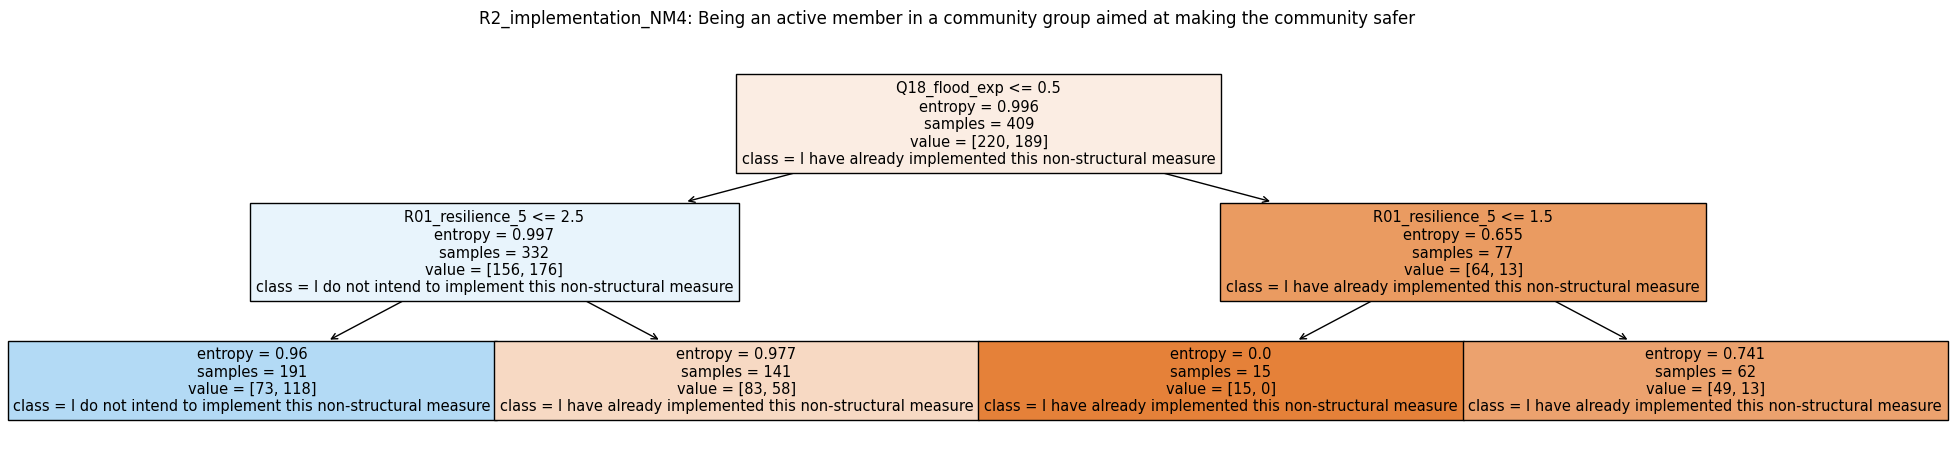

Processing aim: R2_implementation_NM5: Coordinating with the neighbors in case you are not home when a flood occurs, they would know what to do


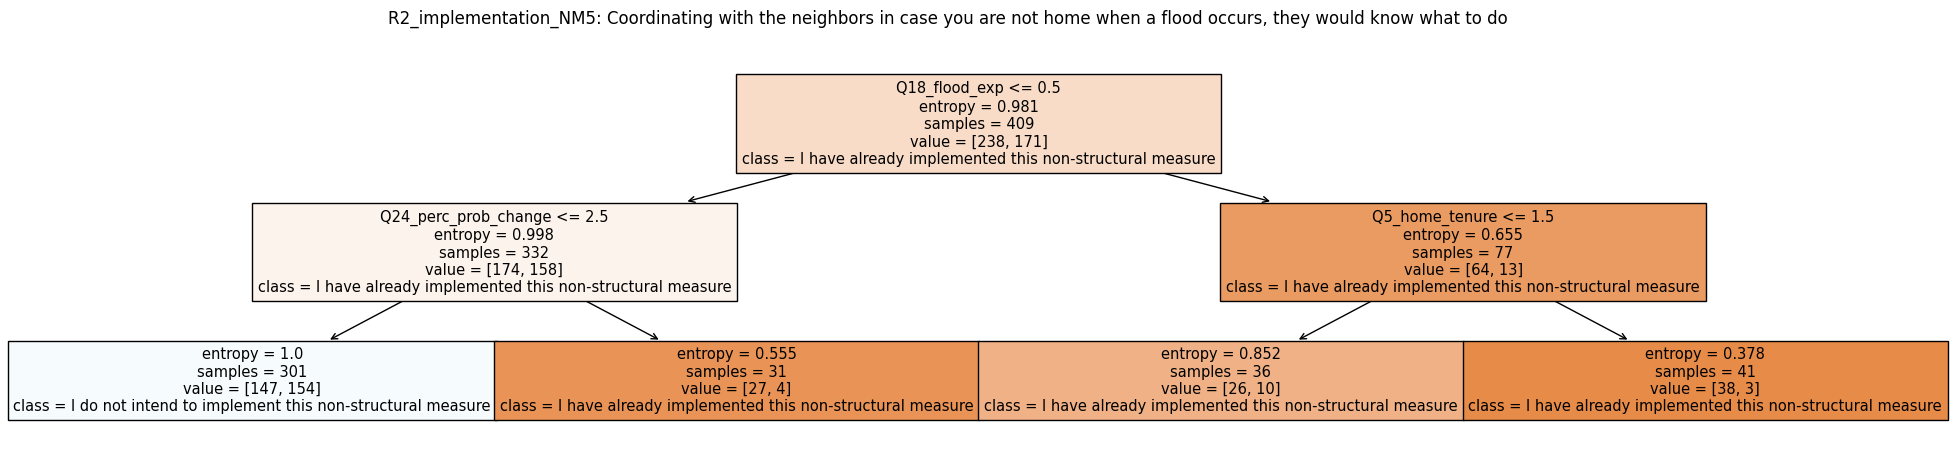

Processing aim: R2_implementation_SM3: Reconstructing or reinforcing the walls and/or the ground floor with water-resistant materials


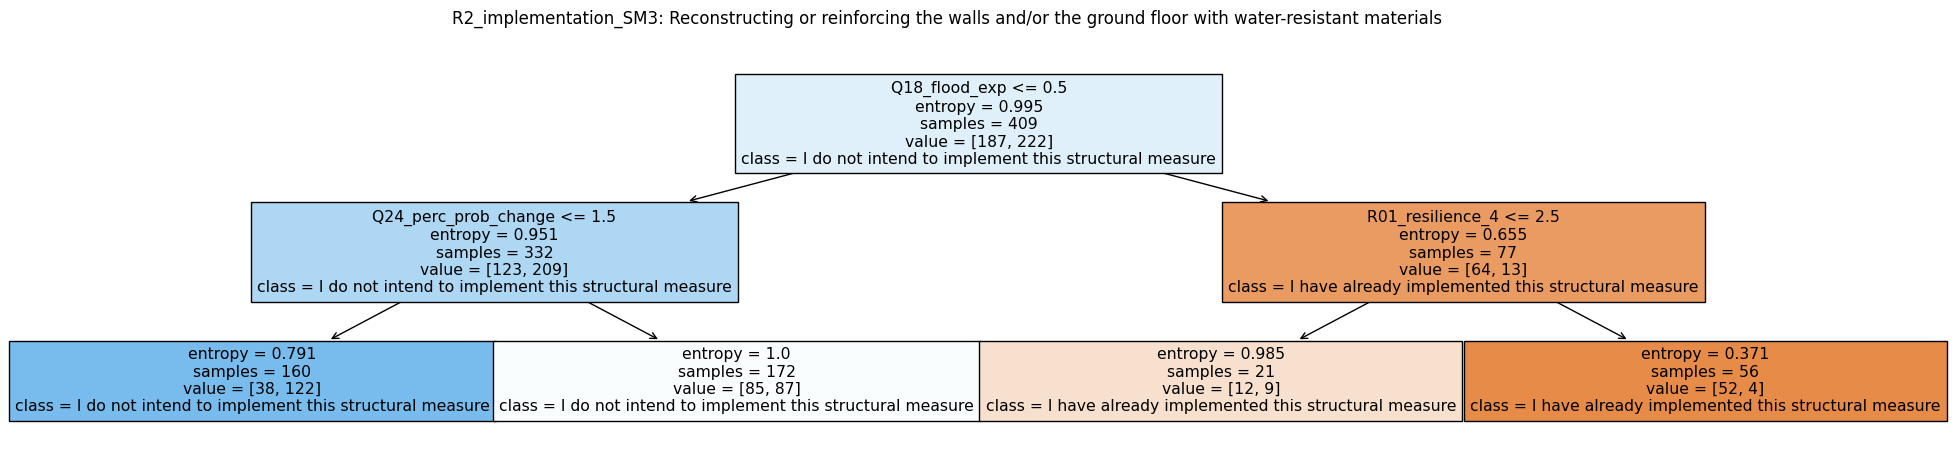

People aged over 45 in the Netherlands
Processing aim: R06a_media_freq: From the general media


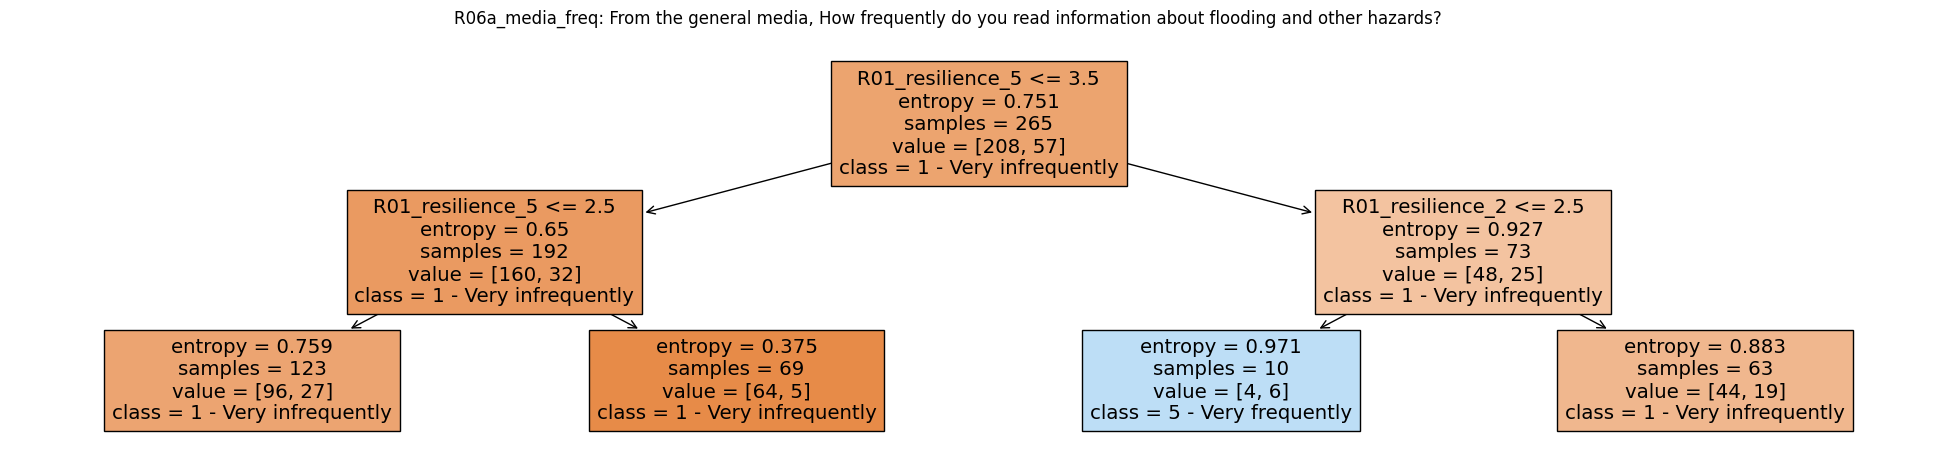

Processing aim: R2_implementation_NM4: Being an active member in a community group aimed at making the community safer
Processing aim: R2_implementation_NM5: Coordinating with the neighbors in case you are not home when a flood occurs, they would know what to do
Processing aim: R2_implementation_SM3: Reconstructing or reinforcing the walls and/or the ground floor with water-resistant materials


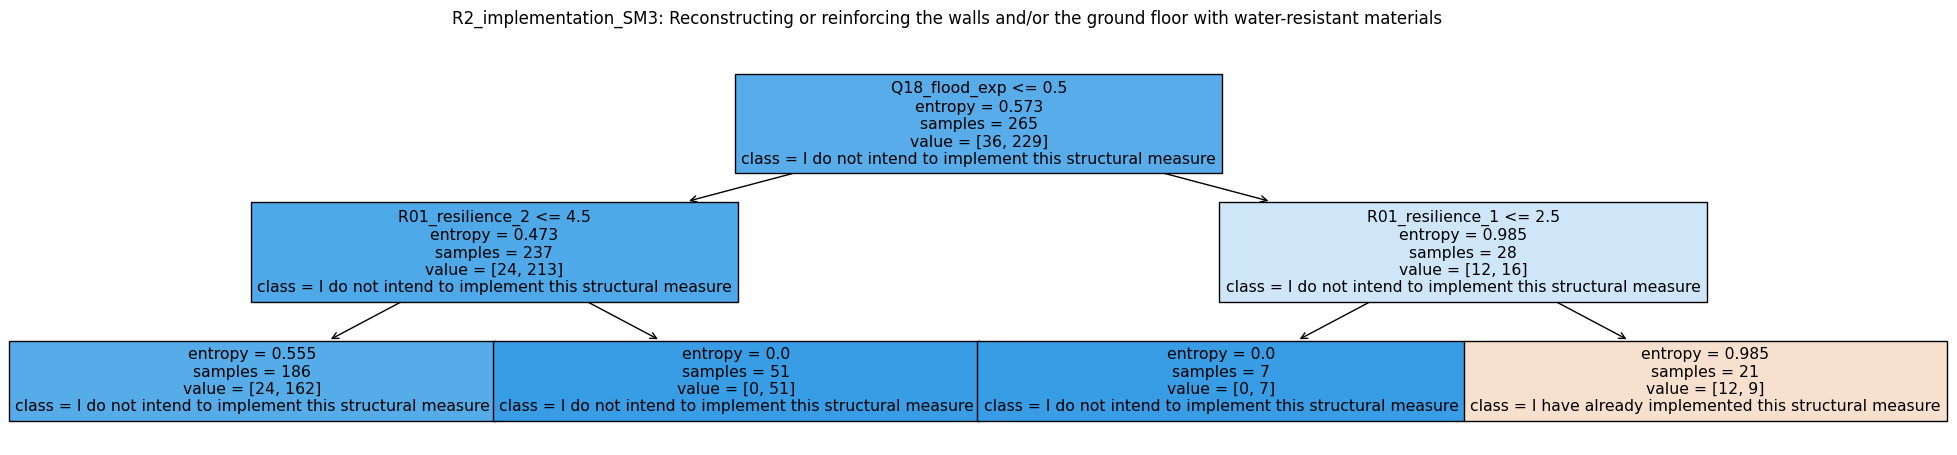

Males living in the Netherlands
Processing aim: R06a_media_freq: From the general media
Processing aim: R2_implementation_NM4: Being an active member in a community group aimed at making the community safer


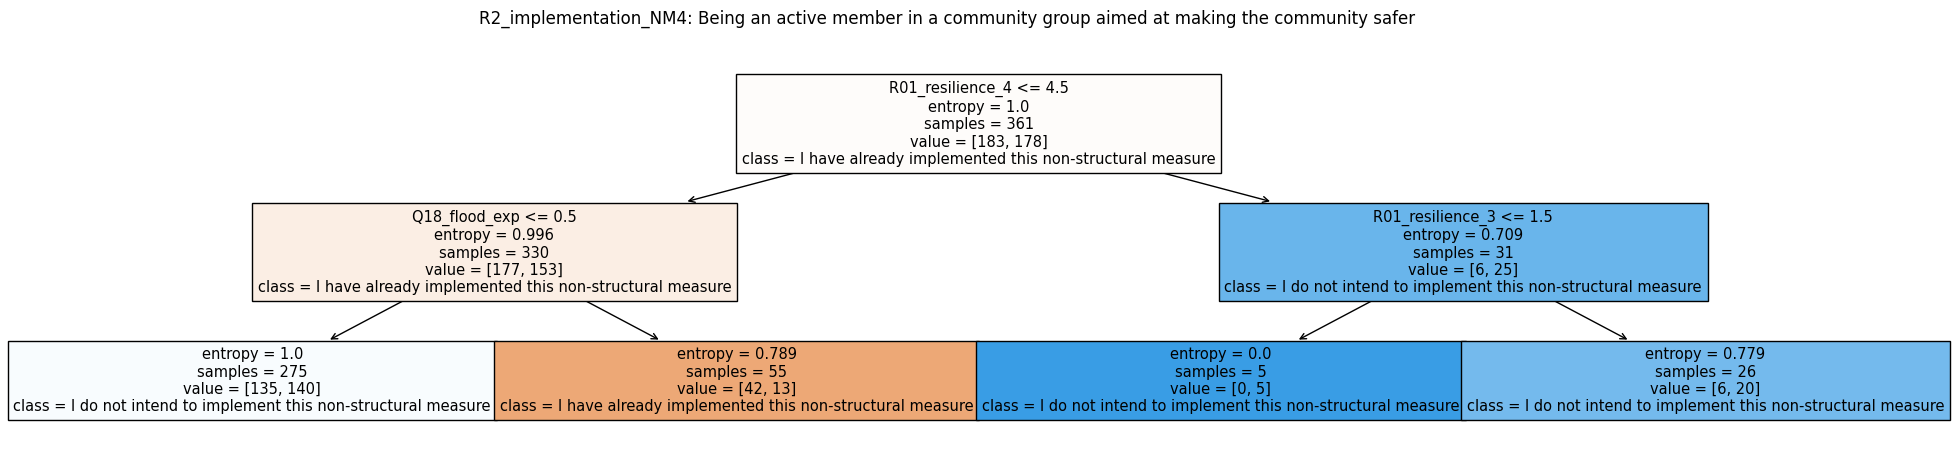

Processing aim: R2_implementation_NM5: Coordinating with the neighbors in case you are not home when a flood occurs, they would know what to do
Processing aim: R2_implementation_SM3: Reconstructing or reinforcing the walls and/or the ground floor with water-resistant materials


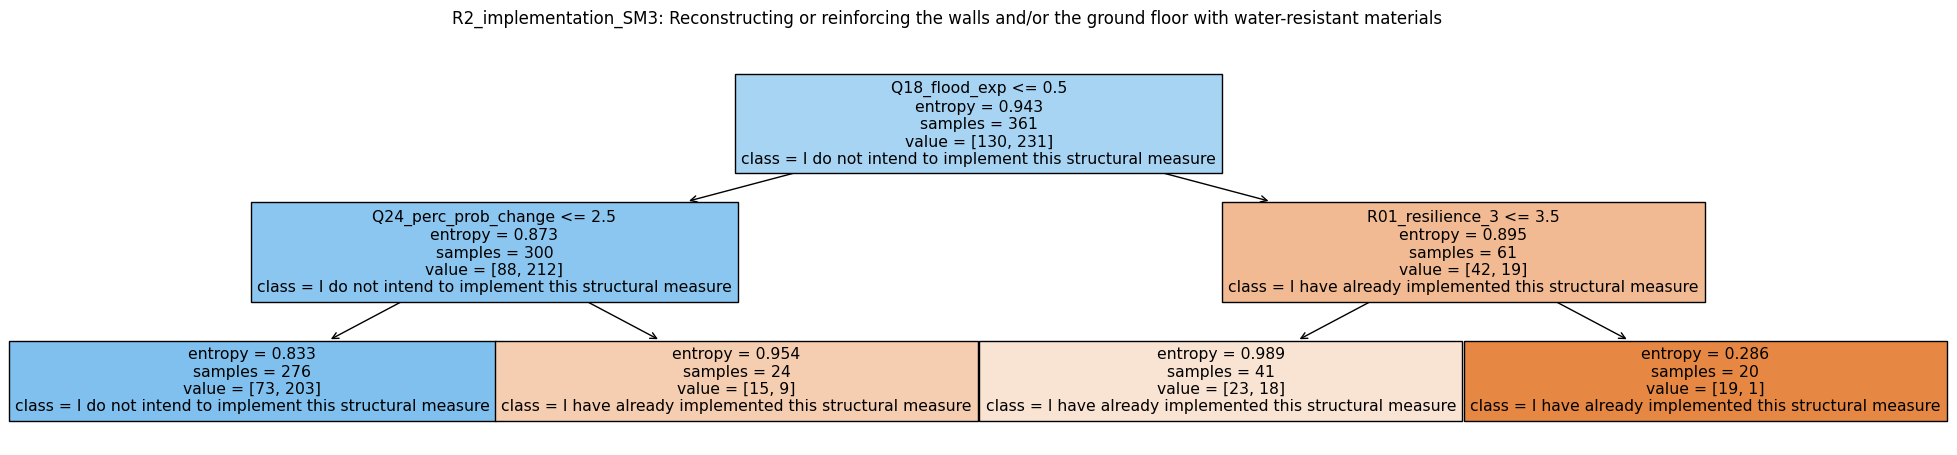

Females living in the Netherlands
Processing aim: R06a_media_freq: From the general media
Processing aim: R2_implementation_NM4: Being an active member in a community group aimed at making the community safer
Processing aim: R2_implementation_NM5: Coordinating with the neighbors in case you are not home when a flood occurs, they would know what to do


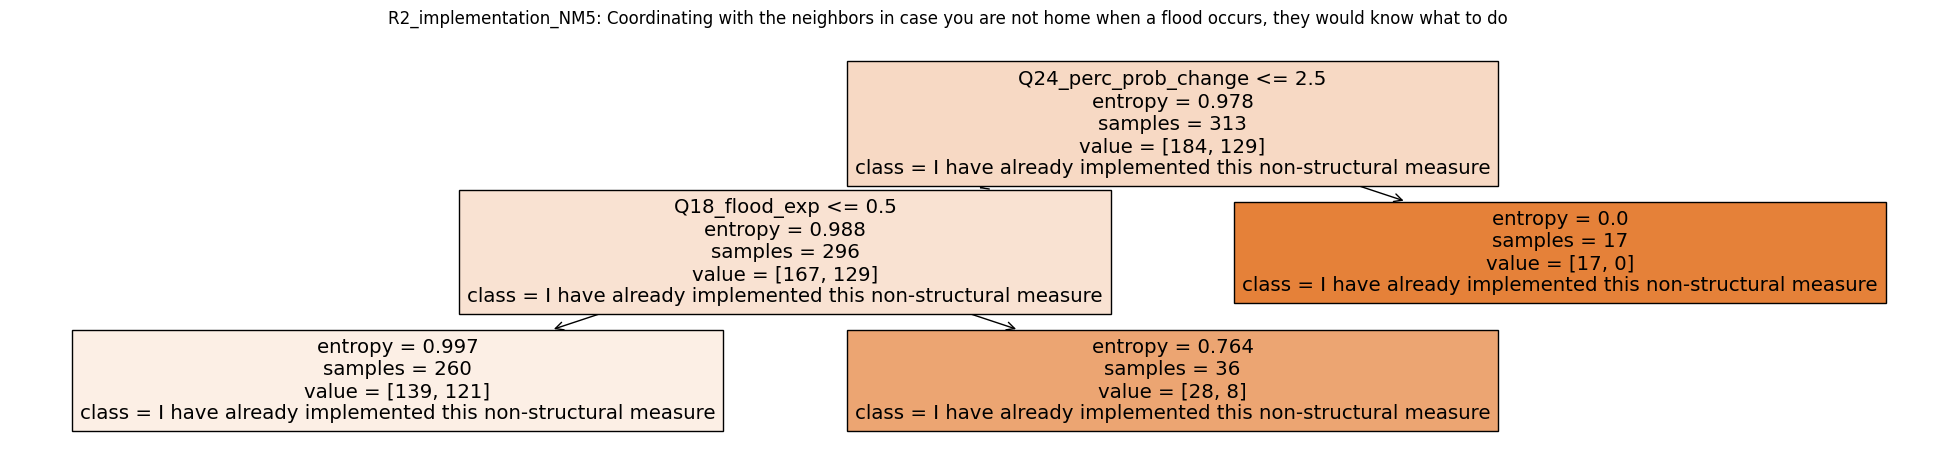

Processing aim: R2_implementation_SM3: Reconstructing or reinforcing the walls and/or the ground floor with water-resistant materials
People living in the Netherlands that have not completed highschool
Processing aim: R06a_media_freq: From the general media


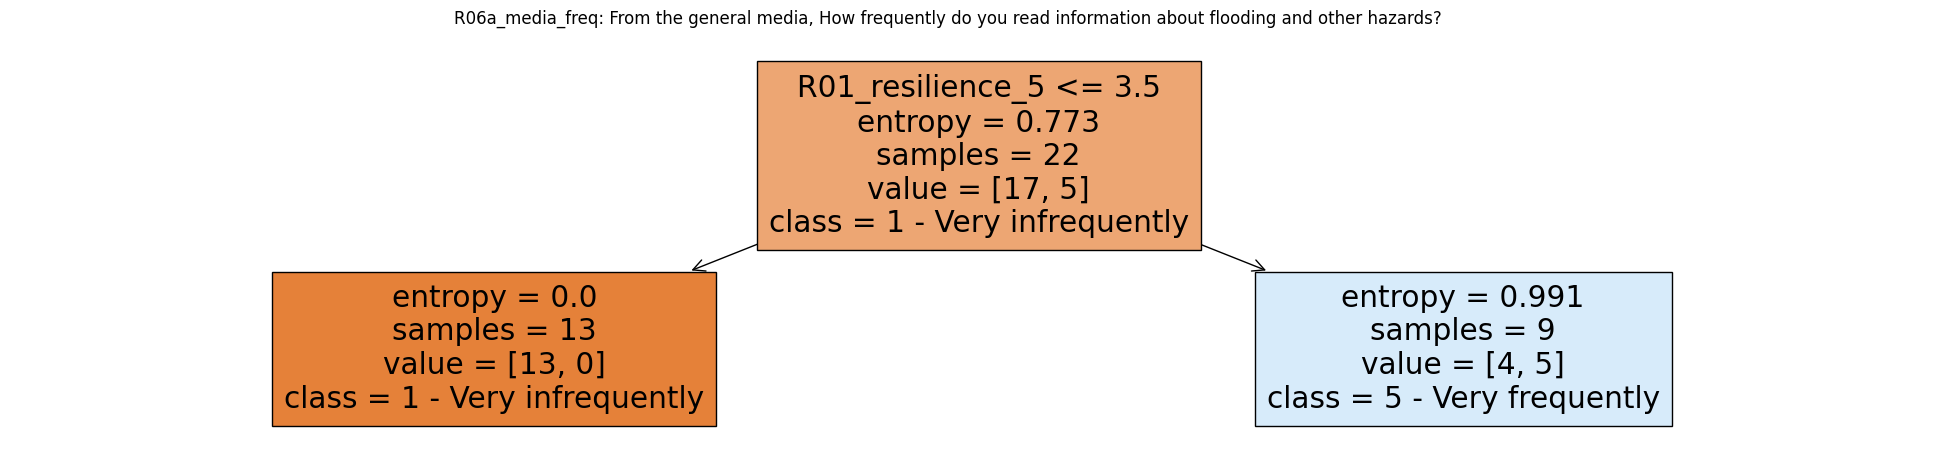

Processing aim: R2_implementation_NM4: Being an active member in a community group aimed at making the community safer


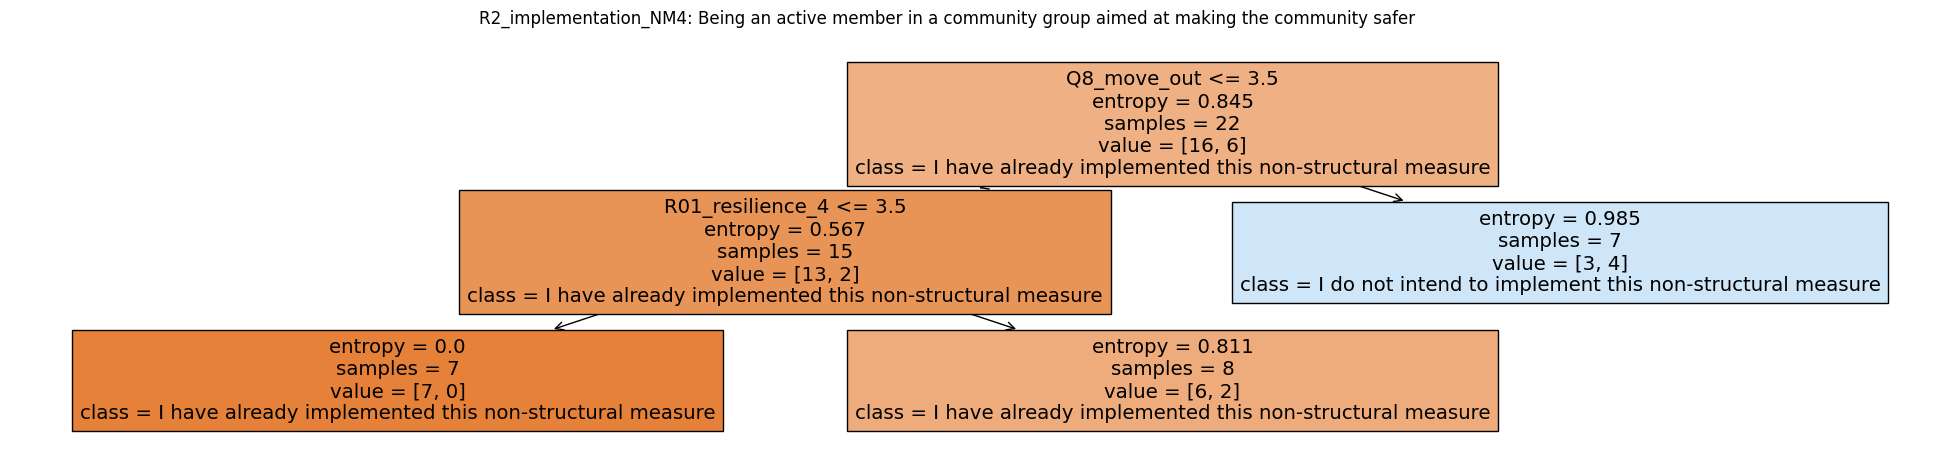

Processing aim: R2_implementation_NM5: Coordinating with the neighbors in case you are not home when a flood occurs, they would know what to do


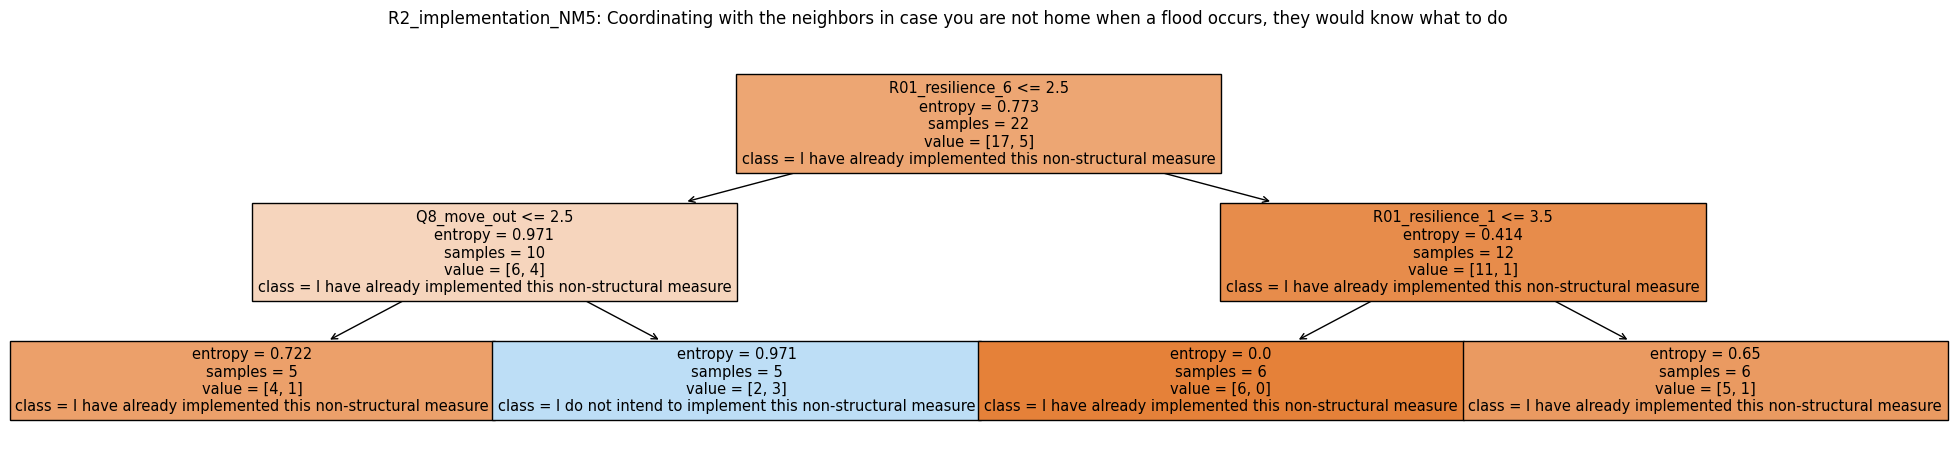

Processing aim: R2_implementation_SM3: Reconstructing or reinforcing the walls and/or the ground floor with water-resistant materials
People living in the Netherlands that have completed highschool
Processing aim: R06a_media_freq: From the general media


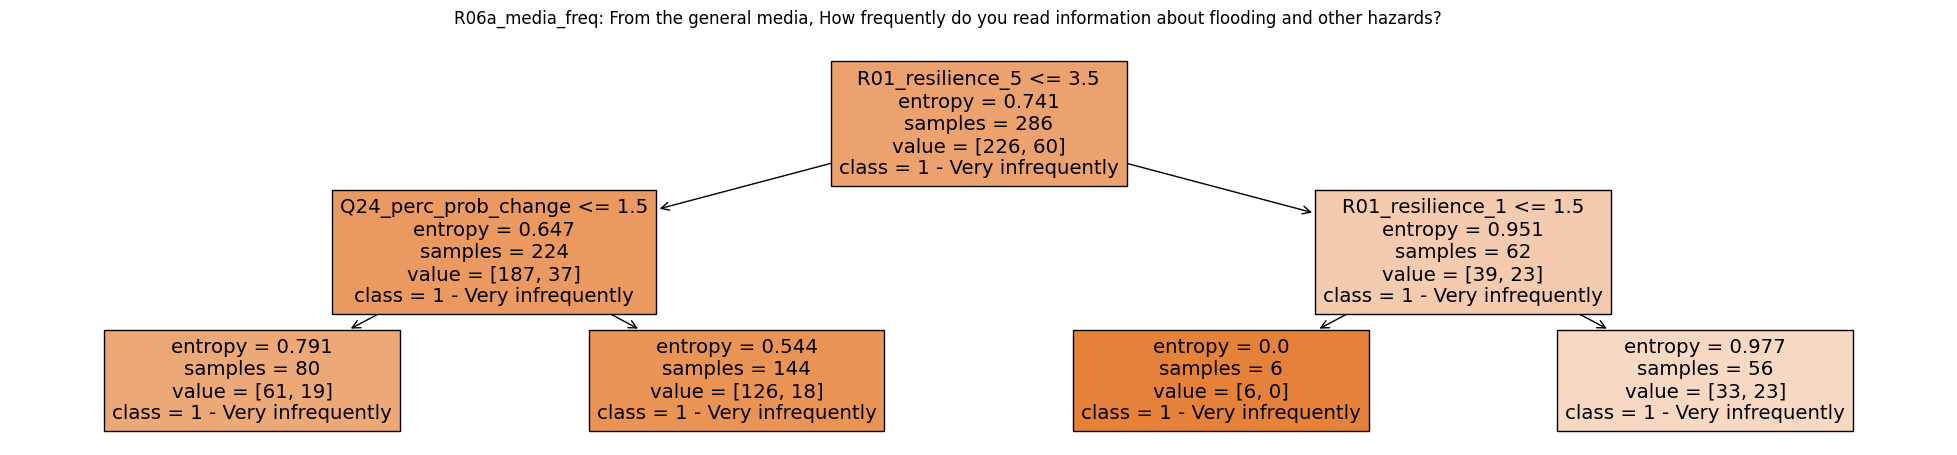

Processing aim: R2_implementation_NM4: Being an active member in a community group aimed at making the community safer


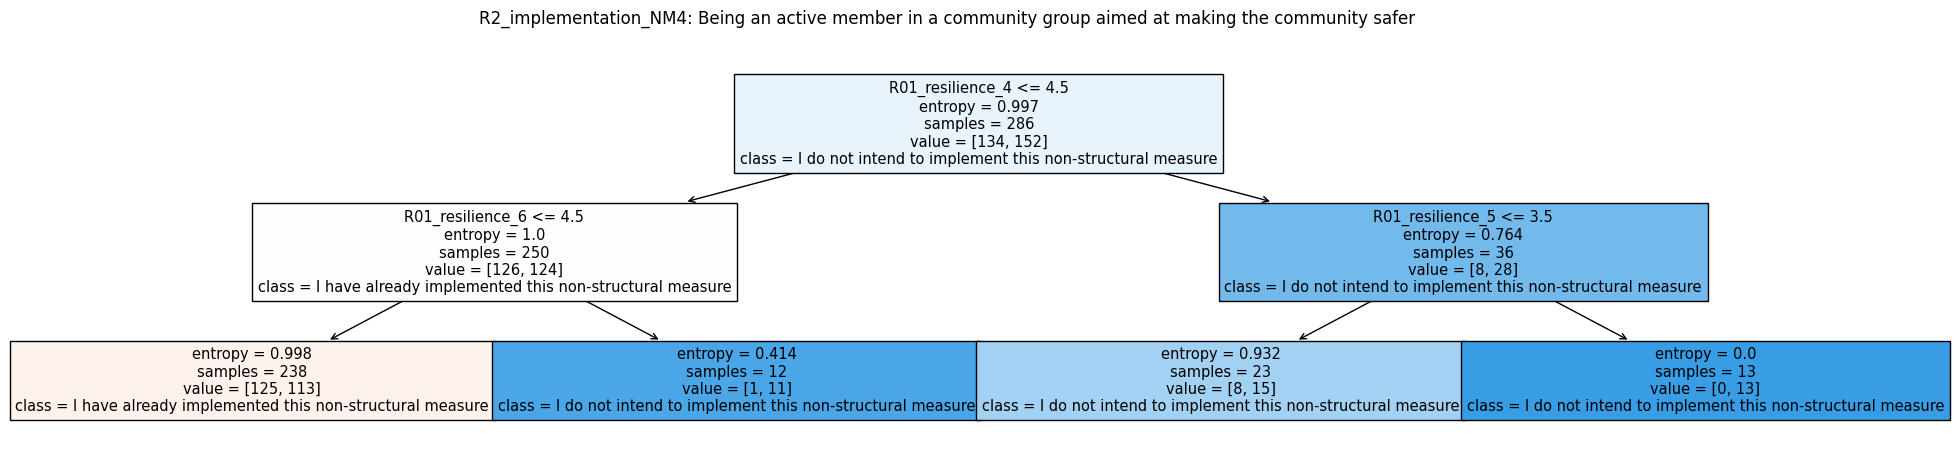

Processing aim: R2_implementation_NM5: Coordinating with the neighbors in case you are not home when a flood occurs, they would know what to do


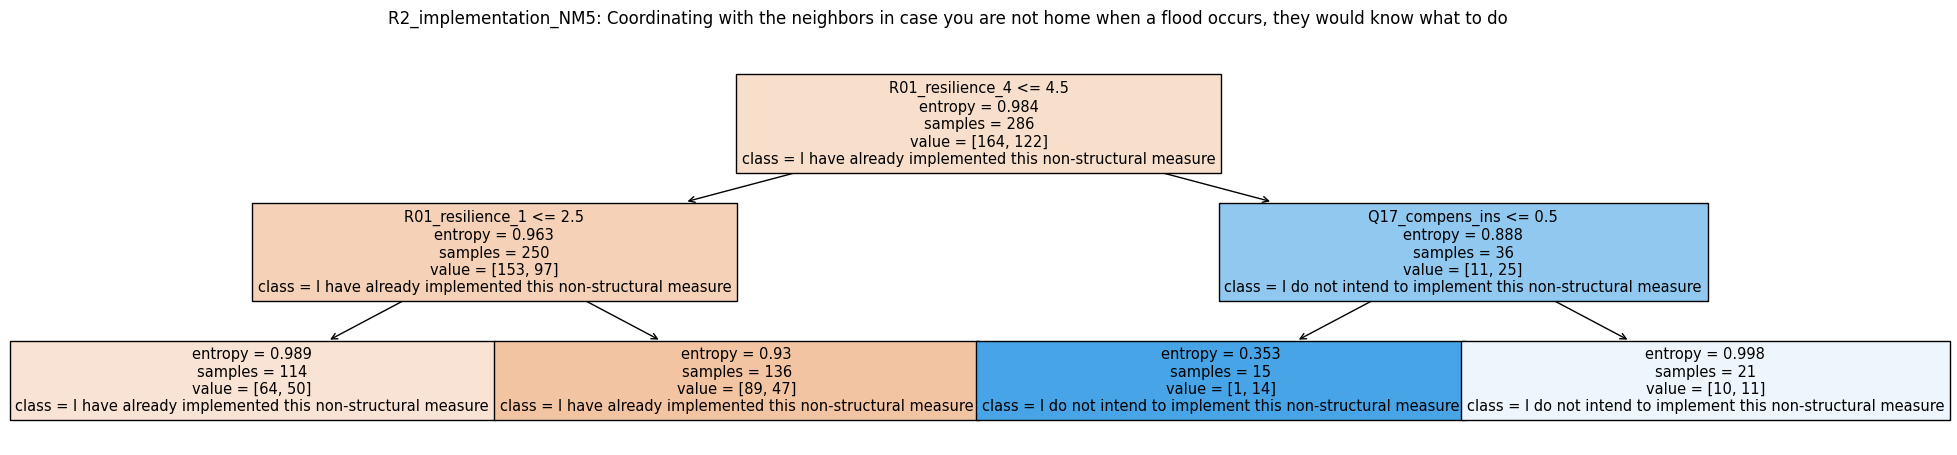

Processing aim: R2_implementation_SM3: Reconstructing or reinforcing the walls and/or the ground floor with water-resistant materials


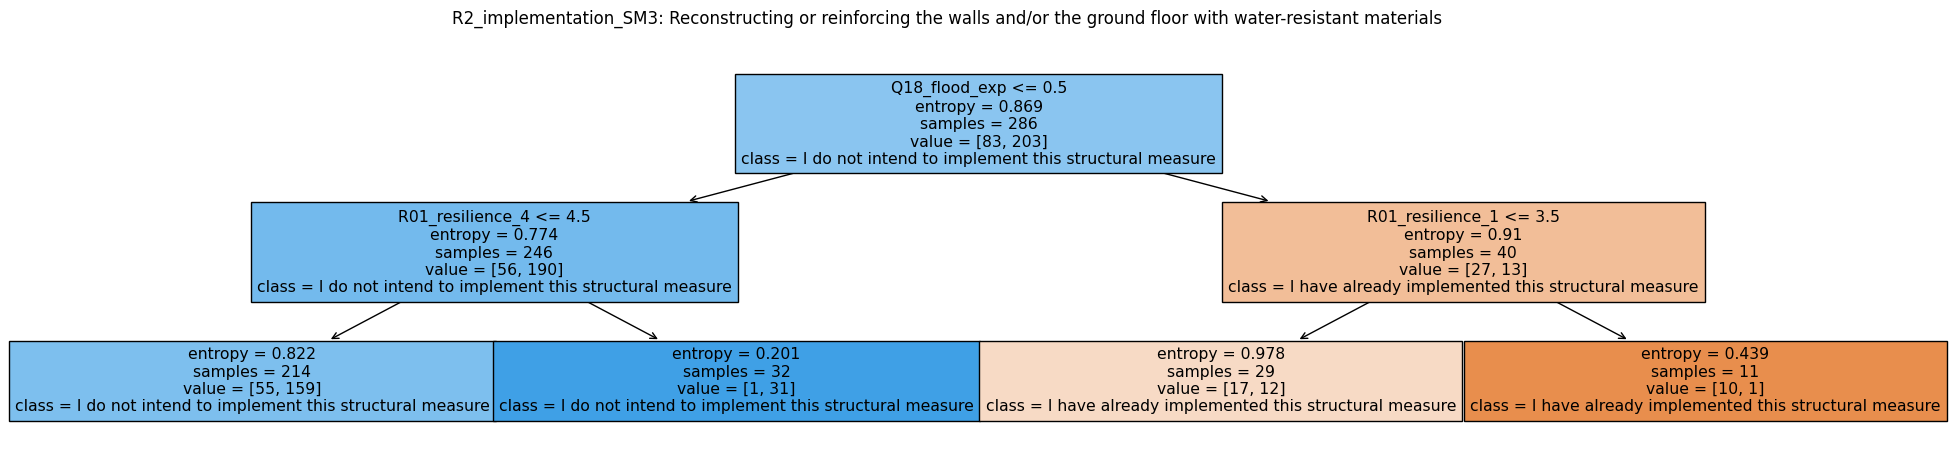

People living in the Netherlands with at least a college degree
Processing aim: R06a_media_freq: From the general media
Processing aim: R2_implementation_NM4: Being an active member in a community group aimed at making the community safer
Processing aim: R2_implementation_NM5: Coordinating with the neighbors in case you are not home when a flood occurs, they would know what to do
Processing aim: R2_implementation_SM3: Reconstructing or reinforcing the walls and/or the ground floor with water-resistant materials


,Attribute,Aim,Aim_description,Aim_resp,total_aim,Condition1,Condition1_description,Condition1_resp,filter1,Condition2,Condition2_description,Condition2_resp,filter2,final_entropy
0,People aged under 45 in the Netherlands,R2_implementation_NM4,Being an active member in a community group ai...,I have already implemented this non-structural...,220.0,Q18_flood_exp,Have you ever personally experienced a flood o...,Yes,64.0,R01_resilience_5,My household can rely on the support of family...,"2, 3, 4, 5 - Strongly disagree",15.0,0.000000
1,People aged under 45 in the Netherlands,R2_implementation_NM5,Coordinating with the neighbors in case you ar...,I have already implemented this non-structural...,238.0,Q18_flood_exp,Have you ever personally experienced a flood o...,Yes,64.0,Q5_home_tenure,Do you rent or own your accommodation?,"Own, Other",38.0,0.377646
2,People aged under 45 in the Netherlands,R2_implementation_SM3,Reconstructing or reinforcing the walls and/or...,I have already implemented this structural mea...,187.0,Q18_flood_exp,Have you ever personally experienced a flood o...,Yes,64.0,R01_resilience_4,"During times of hardship, my household can acc...","3, 4, 5 - Strongly disagree",52.0,0.371232
3,People aged over 45 in the Netherlands,R06a_media_freq,"From the general media, How frequently do you ...",1 - Very infrequently,208.0,R01_resilience_5,My household can rely on the support of family...,"1 - Strongly agree, 2, 3",160.0,R01_resilience_5,My household can rely on the support of family...,"3, 4, 5 - Strongly disagree",64.0,0.375051
4,People aged over 45 in the Netherlands,R2_implementation_SM3,Reconstructing or reinforcing the walls and/or...,I do not intend to implement this structural m...,229.0,Q18_flood_exp,Have you ever personally experienced a flood o...,No,213.0,R01_resilience_2,"During times of hardship, my household can cha...",5 - Strongly disagree,51.0,0.000000
5,Males living in the Netherlands,R2_implementation_NM4,Being an active member in a community group ai...,I do not intend to implement this non-structur...,178.0,R01_resilience_4,"During times of hardship, my household can acc...",5 - Strongly disagree,25.0,R01_resilience_3,If hardships or natural disasters became more ...,"2, 3, 4, 5 - Strongly disagree",5.0,0.000000
6,Males living in the Netherlands,R2_implementation_SM3,Reconstructing or reinforcing the walls and/or...,I have already implemented this structural mea...,130.0,Q18_flood_exp,Have you ever personally experienced a flood o...,Yes,42.0,R01_resilience_3,If hardships or natural disasters became more ...,"4, 5 - Strongly disagree",19.0,0.286397
7,Females living in the Netherlands,R2_implementation_NM5,Coordinating with the neighbors in case you ar...,I have already implemented this non-structural...,184.0,Q24_perc_prob_change,Do you expect that the risk of flooding in you...,"Decrease, Don’t know",17.0,"(None,)",None,,17.0,0.000000
8,People living in the Netherlands that have not...,R06a_media_freq,"From the general media, How frequently do you ...",1 - Very infrequently,17.0,R01_resilience_5,My household can rely on the support of family...,"4, 5 - Strongly disagree",13.0,"(None,)",None,,13.0,0.000000
9,People living in the Netherlands that have not...,R2_implementation_NM4,Being an active member in a community group ai...,I have already implemented this non-structural...,16.0,Q8_move_out,How much longer are you planning on staying in...,"I am looking to move in 1 year or less, 1-5 ye...",13.0,R01_resilience_4,"During times of hardship, my household can acc...","4, 5 - Strongly disagree",7.0,0.000000


In [156]:
#create a table that will be filled by selected combinations of aims and conditions with the relevant information for further processing 
statement_questions = pd.DataFrame(columns = ['Attribute', 'Aim', 'Aim_description', 'Aim_resp', 'total_aim', 'Condition1', 'Condition1_description', 'Condition1_resp', 'filter1', 'Condition2', 'Condition2_description', 'Condition2_resp', 'filter2', 'final_entropy'])

responses_demographic1 = adjusted_responses[adjusted_responses["Q0_age"] <= 3] #Aged under 45
responses_demographic2 = adjusted_responses[adjusted_responses["Q0_age"] > 3] #Aged over 45
responses_demographic3 = adjusted_responses[adjusted_responses["Q0_gender"] == 1] #Male
responses_demographic4 = adjusted_responses[adjusted_responses["Q0_gender"] == 2] #Female
responses_demographic5 = adjusted_responses[adjusted_responses["Q0_education_NL"] == 1] #Not completed Highschool
responses_demographic6 = adjusted_responses[adjusted_responses["Q0_education_NL"] == 2] #Completed Highschool
responses_demographic7 = adjusted_responses[adjusted_responses["Q0_education_NL"] >= 3] #Has some form of college degree


statement_questions =  select_statements(chosen_aims, adjusted_responses, statement_questions, "People living in the Netherlands")
statement_questions =  select_statements(chosen_aims, responses_demographic1, statement_questions, "People aged under 45 in the Netherlands")
statement_questions =  select_statements(chosen_aims, responses_demographic2, statement_questions, "People aged over 45 in the Netherlands")
statement_questions =  select_statements(chosen_aims, responses_demographic3, statement_questions, "Males living in the Netherlands")
statement_questions =  select_statements(chosen_aims, responses_demographic4, statement_questions, "Females living in the Netherlands")
statement_questions =  select_statements(chosen_aims, responses_demographic5, statement_questions, "People living in the Netherlands that have not completed highschool")
statement_questions =  select_statements(chosen_aims, responses_demographic6, statement_questions, "People living in the Netherlands that have completed highschool")
statement_questions =  select_statements(chosen_aims, responses_demographic7, statement_questions, "People living in the Netherlands with at least a college degree")

display(statement_questions)

# Save the DataFrame to a CSV file
statement_questions.to_csv("tree_selected_statements.csv", index=False)

AI - IG Statement generator:


In [157]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_groq import ChatGroq

import sys
import json
# Add the parent directory to the path
sys.path.append('..')

# Now you can import the config module
from config import groqkey

In [177]:
edited_statement_questions

,Attribute,Aim,Condition1,Condition2
0,People aged under 45 in the Netherlands,Being an active member in a community group ai...,Have you ever personally experienced a flood o...,My household can rely on the support of family...
1,People aged under 45 in the Netherlands,Coordinating with the neighbors in case you ar...,Have you ever personally experienced a flood o...,Do you rent or own your accommodation? Respons...
2,People aged under 45 in the Netherlands,Reconstructing or reinforcing the walls and/or...,Have you ever personally experienced a flood o...,"During times of hardship, my household can acc..."
3,People aged over 45 in the Netherlands,"From the general media, How frequently do you ...",My household can rely on the support of family...,My household can rely on the support of family...
4,People aged over 45 in the Netherlands,Reconstructing or reinforcing the walls and/or...,Have you ever personally experienced a flood o...,"During times of hardship, my household can cha..."
5,Males living in the Netherlands,Being an active member in a community group ai...,"During times of hardship, my household can acc...",If hardships or natural disasters became more ...
6,Males living in the Netherlands,Reconstructing or reinforcing the walls and/or...,Have you ever personally experienced a flood o...,If hardships or natural disasters became more ...
7,Females living in the Netherlands,Coordinating with the neighbors in case you ar...,Do you expect that the risk of flooding in you...,NaN
8,People living in the Netherlands that have not...,"From the general media, How frequently do you ...",My household can rely on the support of family...,NaN
9,People living in the Netherlands that have not...,Being an active member in a community group ai...,How much longer are you planning on staying in...,"During times of hardship, my household can acc..."


In [179]:
edited_statement_questions = pd.DataFrame(columns=['Attribute', 'Aim', 'Condition1', 'Condition2'])
edited_statement_questions['Attribute'] = statement_questions['Attribute'].copy()  
edited_statement_questions.loc[:, 'Aim'] = statement_questions['Aim_description'] + " Response: " + statement_questions['Aim_resp'] 
edited_statement_questions.loc[:, 'Condition1'] = statement_questions['Condition1_description']  + " Response: " + statement_questions['Condition1_resp']
edited_statement_questions.loc[:, 'Condition2'] = statement_questions['Condition2_description']  + " Response: " + statement_questions['Condition2_resp']

# Convert the DataFrame to JSON text
json_text = edited_statement_questions.to_json()

# Print the JSON text
print(json_text)

{"Attribute":{"0":"People aged under 45 in the Netherlands","1":"People aged under 45 in the Netherlands","2":"People aged under 45 in the Netherlands","3":"People aged over 45 in the Netherlands","4":"People aged over 45 in the Netherlands","5":"Males living in the Netherlands","6":"Males living in the Netherlands","7":"Females living in the Netherlands","8":"People living in the Netherlands that have not completed highschool","9":"People living in the Netherlands that have not completed highschool","10":"People living in the Netherlands that have not completed highschool","11":"People living in the Netherlands that have completed highschool","12":"People living in the Netherlands that have completed highschool","13":"People living in the Netherlands that have completed highschool","14":"People living in the Netherlands that have completed highschool"},"Aim":{"0":"Being an active member in a community group aimed at making the community safer, Please indicate if you have already imple

In [178]:
##Json Approach

statlist = []
models = ["gemma-7b-it", "llama3-8b-8192", "mixtral-8x7b-32768", "llama3-70b-8192"]
llm = ChatGroq(temperature=0, model=models[1], api_key=groqkey)

"""Here is an example: "Attribute": "People", "Aim":"do this specific action", "Condition1": "if this condition is met", "Condition2": "and this condition is met" """

def ExampleCompletionFunction(request):
    system = """You are a json interpreter that transforms an aggregated collection of survey questions and responses into structured statements depicting a group action influenced by specific conditions.
           
                The input json will have the following variables:
                'Attribute':The attribute/demographic value of the survey responses, 
                'Aim': the action question the responders were asked and the aggregated response to the aim, 
                'Condition1': the first related condition question the responders were asked and the aggregated response to the first condition question, 
                'Condition2': the second related condition question the responders were asked and the aggregated response to the second condition question, 

                You can only provide responses in JSON format.
                You rewrite the provided json to make the following keys of your output json: 
                "Attribute": "Attribute", 
                "Aim": Combine and rewrite 'Aim' as an action (starting with Base Form/Infinitive verb), 
                "Condition1": "if" + Combine and rewrite 'Condition1' as a condition that should be met (3rd-person/they), 
                "Condition2": "and if" + Combine and rewrite 'Condition2' as a condition that should be met (3rd-person/they)
                
                I should be able to combine your output Attribute + Aim + Condition1 + Condition2 to form a full 3rd-person (they) sentence that describes the behaviour of the demogrpahic. 
                Be concise but do not simplify or generalise the actions and conditions.  
                Do not change negative components to positive.
                You should treat every object separately and produce the same number of objects as have been provided.
                """
    human = "{text}"
    prompt  = ChatPromptTemplate.from_messages([("system", system), ("human", human)])

    chain = prompt | llm
    response = chain.invoke({"text": request})
    return response.content

IG_Statement = ExampleCompletionFunction(json_text)
print(IG_Statement)
statlist.append(IG_Statement)


Here is the output in JSON format:

[
  {
    "Attribute": "People aged under 45 in the Netherlands",
    "Aim": "Implement non-structural measures to make the community safer",
    "Condition1": "if they have ever personally experienced a flood of any kind",
    "Condition2": "and if they do not intend to implement structural measures"
  },
  {
    "Attribute": "People aged under 45 in the Netherlands",
    "Aim": "Implement structural measures to make the community safer",
    "Condition1": "if they have ever personally experienced a flood of any kind",
    "Condition2": "and if they do not intend to implement non-structural measures"
  },
  {
    "Attribute": "People aged over 45 in the Netherlands",
    "Aim": "Read information about flooding and other hazards from the general media",
    "Condition1": "if they can rely on the support of family and friends when they need help",
    "Condition2": "and if they do not intend to implement non-structural measures"
  },
  {
    "Attribut

In [175]:
df = pd.DataFrame(columns=["Attribute","Aim","Condition1", "Condition2"])
try:
    # Parse the JSON string into a Python dictionary
    data_dict = json.loads(IG_Statement)
except:
    # Parse the JSON string into a Python dictionary
    data_dict = json.loads('['+IG_Statement.split('[')[1].split(']')[0]+']')        

# Convert the dictionary to a DataFrame
# Since we have only one record, we wrap it in a list to make a single-row DataFrame
IG_component_df = pd.DataFrame(data_dict)

display(IG_component_df)

,Attribute,Aim,Condition1,Condition2
0,People aged under 45 in the Netherlands,to be an active member in a community group ai...,if they have ever personally experienced a flo...,and if they do not intend to implement any non...
1,People aged under 45 in the Netherlands,to coordinate with the neighbors in case you a...,if they have ever personally experienced a flo...,and if they do not intend to implement any non...
2,People aged under 45 in the Netherlands,to reconstruct or reinforce the walls and/or t...,if they have ever personally experienced a flo...,and if they do not intend to implement any str...
3,People aged over 45 in the Netherlands,to read information about flooding and other h...,if they can rely on the support of family and ...,and if they do not intend to implement any str...
4,People aged over 45 in the Netherlands,to reconstruct or reinforce the walls and/or t...,if they have not ever personally experienced a...,and if they do not intend to implement any str...
5,Males living in the Netherlands,to be an active member in a community group ai...,if they can access the financial support they ...,and if they do not intend to implement any non...
6,Males living in the Netherlands,to reconstruct or reinforce the walls and/or t...,if they have ever personally experienced a flo...,and if they do not intend to implement any str...
7,Females living in the Netherlands,to coordinate with the neighbors in case you a...,if they expect the risk of flooding in their a...,None
8,People living in the Netherlands that have not...,to read information about flooding and other h...,if they can rely on the support of family and ...,None
9,People living in the Netherlands that have not...,to be an active member in a community group ai...,if they are planning to move in less than a year,and if they do not intend to implement any non...


In [176]:
# Create a Pandas Excel writer using XlsxWriter as the engine
writer = pd.ExcelWriter('SelectedandConvertedStatements.xlsx', engine='xlsxwriter')

# Write each dataframe to a different worksheet
statement_questions.to_excel(writer, sheet_name='Sheet1', index=False)
IG_component_df.to_excel(writer, sheet_name='Sheet2', index=False)

# Close the Pandas Excel writer and output the Excel file
writer.close()


In [269]:
##Json Approach

statlist = []
models = ["gemma-7b-it", "llama3-8b-8192", "mixtral-8x7b-32768", "llama3-70b-8192"]
llm = ChatGroq(temperature=0, model=models[1], api_key=groqkey)

def ExampleCompletionFunction(request):
    system = """You are a text editor that transforms a collection of survey questions and responses into a structured statement depicting a group action influenced by a specific condition.
                You can only provide responses in JSON format. Here is an example response: "Attribute": "People", "Aim":"do this specific action", "Condition": "if this condition is met"
                Assume keys for the JSON object: Attribute, Aim, Condition
                How the provided data should be used: "Attribute": "Attribute", "Aim": "(converted Aim question and response)", "Condition": "(converted Condition question and response)"
                Keep them concise and do not change double-negatives
                """
    human = "{text}"
    prompt  = ChatPromptTemplate.from_messages([("system", system), ("human", human)])

    chain = prompt | llm
    response = chain.invoke({"text": request})
    return response.content

for row in statement_questions.index:
    print("")
    aimRow = Survey_Overview[Survey_Overview["Variable Label\n (Data files)"] == statement_questions.at[row, "Aim"]]
    conditionRow = Survey_Overview[Survey_Overview["Variable Label\n (Data files)"] == statement_questions.at[row, "Condition1"]]
    
    print("Out of",len(Survey_Responses),"survey responses,", int(statement_questions.at[row, 'total_aim']), "responded with:", statement_questions.at[row, 'Aim_resp'],  "to:", str(aimRow.at[aimRow.index[0], 'question_answers_combined']))
    print(int(statement_questions.at[row, 'filter1']), "of those people responded:", statement_questions.at[row, 'Condition1_resp'],  "to:", str(conditionRow.at[conditionRow.index[0], 'question_answers_combined']))
    
    aim_cond_stat = f"""Convert the following set of survey questions and responses into one statement:
                        Attribute: Households in the Netherlands
                        Aim question: '{str(aimRow.at[aimRow.index[0], 'question_answers_combined'])}' and response: '{statement_questions.at[row, 'Aim_resp']}'
                        Condition question: '{conditionRow.at[conditionRow.index[0], 'question_answers_combined']}' and response: '{statement_questions.at[row, 'Condition1_resp']}'
                        """
    
    # aim_cond_stat = f"""(Attribute: Households in the Netherlands),(Aim: {str(aimRow.at[aimRow.index[0], 'question_answers_combined'])} {statement_questions.at[row, 'Aim_resp']}), if (Condition: '{conditionRow.at[conditionRow.index[0], 'question_answers_combined']} {statement_questions.at[row, 'Condition1_resp']})"""

    IG_Statement = ExampleCompletionFunction(aim_cond_stat)
    print(IG_Statement)
    statlist.append(IG_Statement)


Out of 1251 survey responses, 940 responded with: 1 - Very infrequently to: From the general media, How frequently do you read information about flooding and other hazards?
681 of those people responded: 1 - Do not trust at all, 2, 3 to: From the general media, To what extent, if at all, do you trust information about flooding and other hazrds?
{
  "Attribute": "Households in the Netherlands",
  "Aim": "do not read information about flooding and other hazards very frequently",
  "Condition": "if they do not trust information about flooding and other hazards at all"
}

Out of 1251 survey responses, 676 responded with: I do not intend to implement this non-structural measure to: Being an active member in a community group aimed at making the community safer, Please indicate if you have already implemented any of these nonstructural measures or if you intend to do so in the future
519 of those people responded: I have not yet implemented this measure to: Coordinating with the neighbors i

In [273]:
df = pd.DataFrame(columns=["Attribute","Aim","Condition"])
for statementjson in statlist:
    try:
        # Parse the JSON string into a Python dictionary
        data_dict = json.loads(statementjson)
    except:
        # Parse the JSON string into a Python dictionary
        data_dict = json.loads("{"+statementjson.split('{')[1])        

    # Convert the dictionary to a DataFrame
    # Since we have only one record, we wrap it in a list to make a single-row DataFrame
    jsondf = pd.DataFrame([data_dict])
    df = pd.concat([df,jsondf])

display(df)

,Attribute,Aim,Condition
0,Households in the Netherlands,do not read information about flooding and oth...,if they do not trust information about floodin...
0,Households in the Netherlands,do not intend to implement non-structural meas...,if they have not yet implemented measures to c...
0,Households in the Netherlands,already implement non-structural measures to c...,if they are an active member in a community gr...
0,Households in the Netherlands,do not intend to reconstruct or reinforce the ...,if the housing foundations are not strengthene...


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

chosen_aims = ["R06a_media_freq",  "R2_implementation_NM4", "R2_implementation_NM5", "R2_implementation_SM3"]

responses_nadrop = aim_responses.dropna(axis=1)


for aim in chosen_aims:
    print(aim)
    X = responses_nadrop.loc[:, ~responses_nadrop.columns.isin([aim])].values
    Y = responses_nadrop.loc[:, aim].values

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
    
    # Create and train logistic regression model
    clf_logreg = LogisticRegression(max_iter=1000)
    clf_logreg.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf_logreg.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(("Accuracy is"), accuracy)

    # Get feature names
    feature_names = responses_nadrop.loc[:, ~responses_nadrop.columns.isin([aim])].columns

    # Get coefficients
    coefficients = clf_logreg.coef_[0]

    # Create a DataFrame to display feature names and corresponding coefficients
    coef_df = pd.DataFrame({"Feature": feature_names, "Coefficient": coefficients})

    # Sort DataFrame by absolute coefficient values to identify most impactful features
    coef_df["Absolute Coefficient"] = coef_df["Coefficient"].abs()
    coef_df_sorted = coef_df.sort_values(by="Absolute Coefficient", ascending=False)

    # Display the top features impacting the prediction
    print("Top features impacting the prediction:")
    print(coef_df_sorted.head())



R06a_media_freq
Accuracy is 0.6666666666666666
Top features impacting the prediction:
                   Feature  Coefficient  Absolute Coefficient
33          Q14_early_warn    -0.137154              0.137154
131           Q46_dikes_NL     0.129086              0.129086
130  R07_adaptation_others    -0.102253              0.102253
46           R02_perc_prob    -0.084260              0.084260
5         Q1_home_ID_NL_US    -0.063724              0.063724
R2_implementation_NM4
Accuracy is 0.3333333333333333
Top features impacting the prediction:
                       Feature  Coefficient  Absolute Coefficient
5             Q1_home_ID_NL_US    -0.131175              0.131175
14                 Q8_move_out     0.096210              0.096210
140                Q58_savings    -0.081387              0.081387
46               R02_perc_prob     0.051327              0.051327
138  Q56_savings_change_future    -0.042332              0.042332
R2_implementation_NM5
Accuracy is 0.3333333333333333
T

In [ ]:
# Segment data by 'Q0_gender'
gender_groups = AllWave1.groupby('Q0_gender')

# Prepare a structure to hold the results of correlation analysis for each gender group
results = {}

# Iterate over each gender group and calculate correlations between selected conditions and aims
for gender, group in gender_groups:
    # Filter the group data for selected conditions and aims
    subgroup_data = group[selected_conditions + selected_aims].dropna()
    
    # Calculate the correlation matrix for the subgroup
    correlation_matrix = subgroup_data.corr()
    
    # Extract correlations between conditions and aims
    condition_aim_correlations = correlation_matrix.loc[selected_conditions, selected_aims]
    
    # Store the results
    results[gender] = condition_aim_correlations

# Due to the selection of a large number of conditions and aims, and for simplicity,
# let's display the results for the first gender group as an example
results[list(results.keys())[0]]


NameError: name 'selected_conditions' is not defined

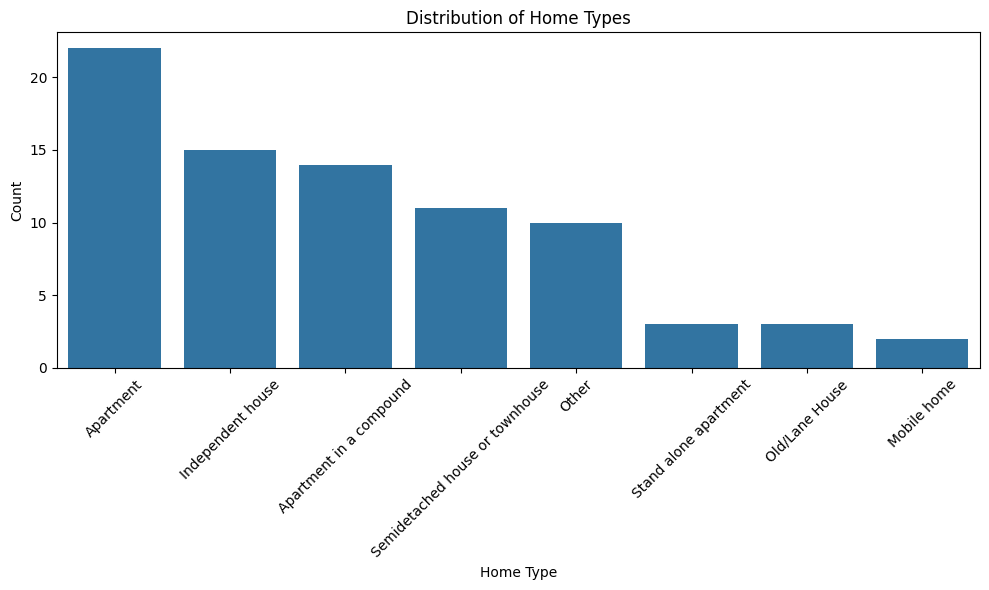

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mapping numerical values to home types
home_type_mapping_ID_NL_US = {
    1.: 'Apartment',
    2.: 'Semidetached house or townhouse',
    3.: 'Independent house',
    4.: 'Mobile home',
    97.: 'Other'
}
home_type_mapping_CN = {
    1.: 'Old/Lane House',
    2.: 'Stand alone apartment',
    3.: 'Apartment in a compound',
    4.: 'Villa',
    5.:	"Serviced Apartment",
    97.:	"Other",
    98.:	"Don't know"
}

# Before applying the mapping for 'Q1_home_CN', ensure it's in the correct numeric format and handle NaN as necessary
AllWave1['Q1_home_ID_NL_US'] = AllWave1['Q1_home_ID_NL_US'].apply(pd.to_numeric, errors='coerce')

# Apply mapping for 'Q1_home_ID_NL_US' with the provided mapping
AllWave1['Q1_home_ID_NL_US'] = AllWave1['Q1_home_ID_NL_US'].map(home_type_mapping_ID_NL_US)

# Before applying the mapping for 'Q1_home_CN', ensure it's in the correct numeric format and handle NaN as necessary
AllWave1['Q1_home_CN'] = AllWave1['Q1_home_CN'].apply(pd.to_numeric, errors='coerce')

# Apply mapping for 'Q1_home_CN' with the provided mapping
AllWave1['Q1_home_CN'] = AllWave1['Q1_home_CN'].map(home_type_mapping_CN)

# Fill NaN values in 'Q1_home_ID_NL_US' with the values from 'Q1_home_CN_mapped'
AllWave1['Q1_home_ID_NL_US'] = AllWave1['Q1_home_ID_NL_US'].fillna(AllWave1['Q1_home_CN'])


# Visualise the distribution of home types
plt.figure(figsize=(10, 6))
sns.countplot(data=AllWave1, x='Q1_home_ID_NL_US', order=AllWave1['Q1_home_ID_NL_US'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Home Types')
plt.xlabel('Home Type')
plt.ylabel('Count')
plt.tight_layout()

plt.show()

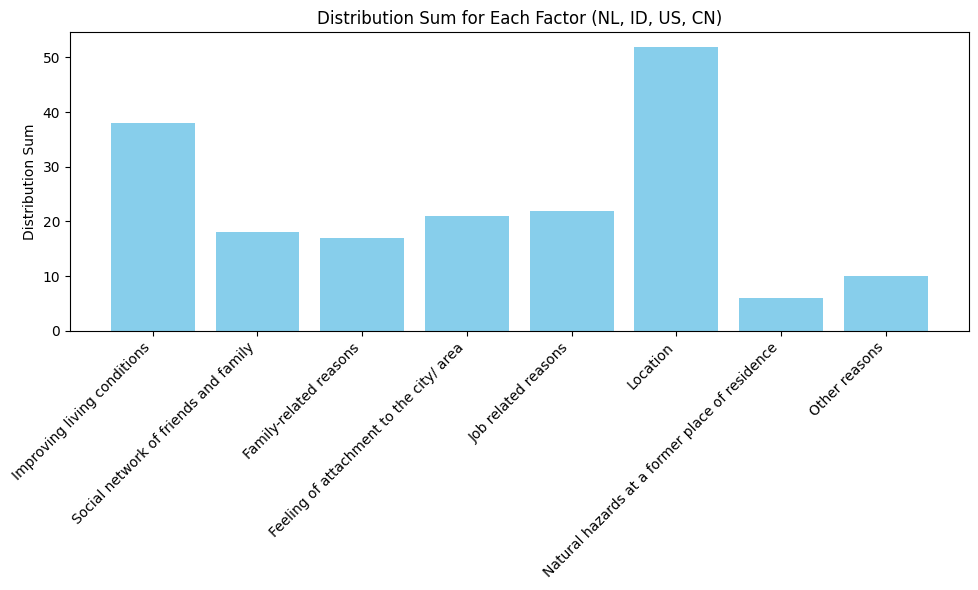

In [ ]:
# Calculate distribution sum for each factor
distribution_sums = []
factors = []

# Define mapping of response options to factors
factor_mapping = {
    'Improving living conditions': 'Q11_search_improve',
    'Social network of friends and family': 'Q11_search_social',
    'Family-related reasons': 'Q11_search_family',
    'Feeling of attachment to the city/ area': 'Q11_search_area',
    'Job related reasons': 'Q11_search_job',
    'Location': 'Q11_search_location',
    'Natural hazards at a former place of residence': 'Q11_search_hazard',
    'Other reasons': 'Q11_search_other',
}

for factor, column in factor_mapping.items():
    distribution_sum = AllWave1[column].sum()
    factors.append(factor)
    distribution_sums.append(distribution_sum)

# Create distribution plot
plt.figure(figsize=(10, 6))
plt.bar(factors, distribution_sums, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Distribution Sum')
plt.title('Distribution Sum for Each Factor (NL, ID, US, CN)')
plt.tight_layout()
plt.show()

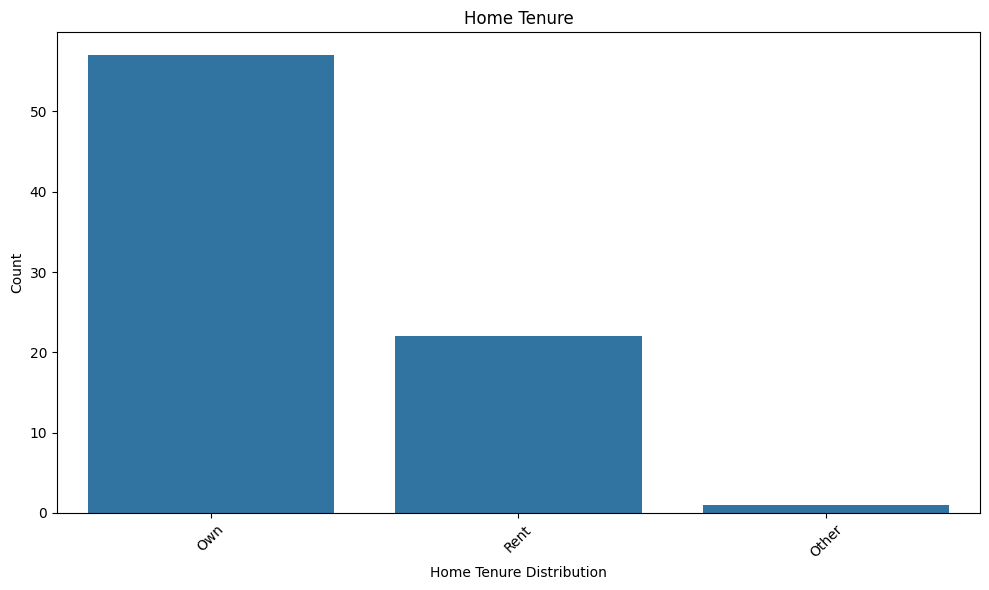

In [ ]:
# Mapping for home tenure
rent_own_mapping = {
    1: 'Rent',
    2: "Own",
    97: 'Other',
}

# Apply mapping
AllWave1['rent_own_mapping'] = AllWave1['Q5_home_tenure'].map(rent_own_mapping)

# Visualize the distribution of home tenure
plt.figure(figsize=(10, 6))
sns.countplot(data=AllWave1, x='rent_own_mapping', order=AllWave1['rent_own_mapping'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Home Tenure')
plt.xlabel('Home Tenure Distribution')
plt.ylabel('Count')
plt.tight_layout()

plt.show()

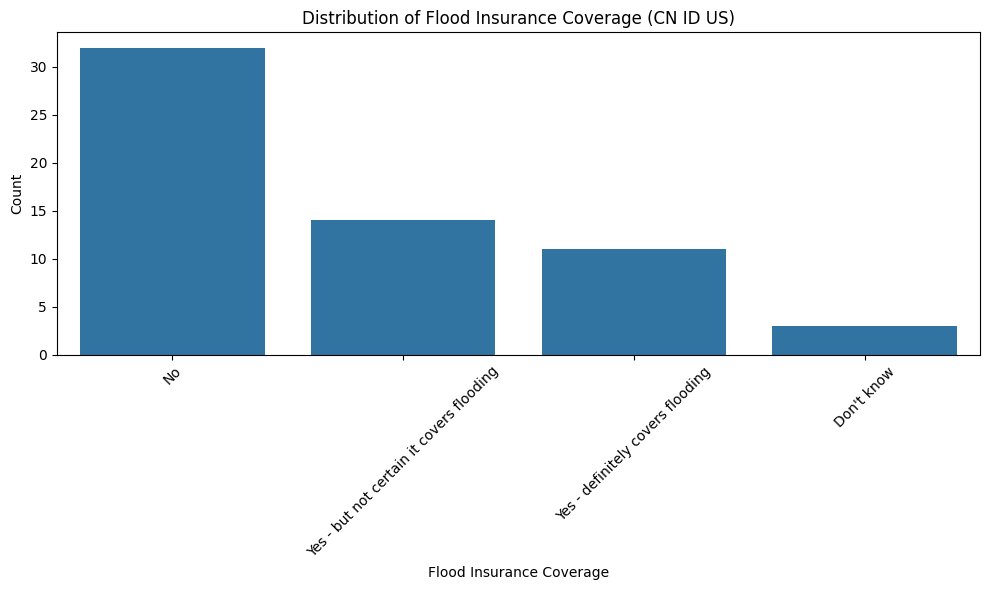

In [ ]:
# Mapping for flood insurance coverage
insurance_coverage_mapping = {
    1: 'Yes - definitely covers flooding',
    2: "Yes - but not certain it covers flooding",
    3: 'No',
    98: "Don't know"
}

# Apply mapping
AllWave1['insurance_coverage_mapped'] = AllWave1['Q41_ins_CN_ID_US'].map(insurance_coverage_mapping)

# Visualize the distribution of insurance coverage
plt.figure(figsize=(10, 6))
sns.countplot(data=AllWave1, x='insurance_coverage_mapped', order=AllWave1['insurance_coverage_mapped'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Flood Insurance Coverage (CN ID US)')
plt.xlabel('Flood Insurance Coverage')
plt.ylabel('Count')
plt.tight_layout()

plt.show()

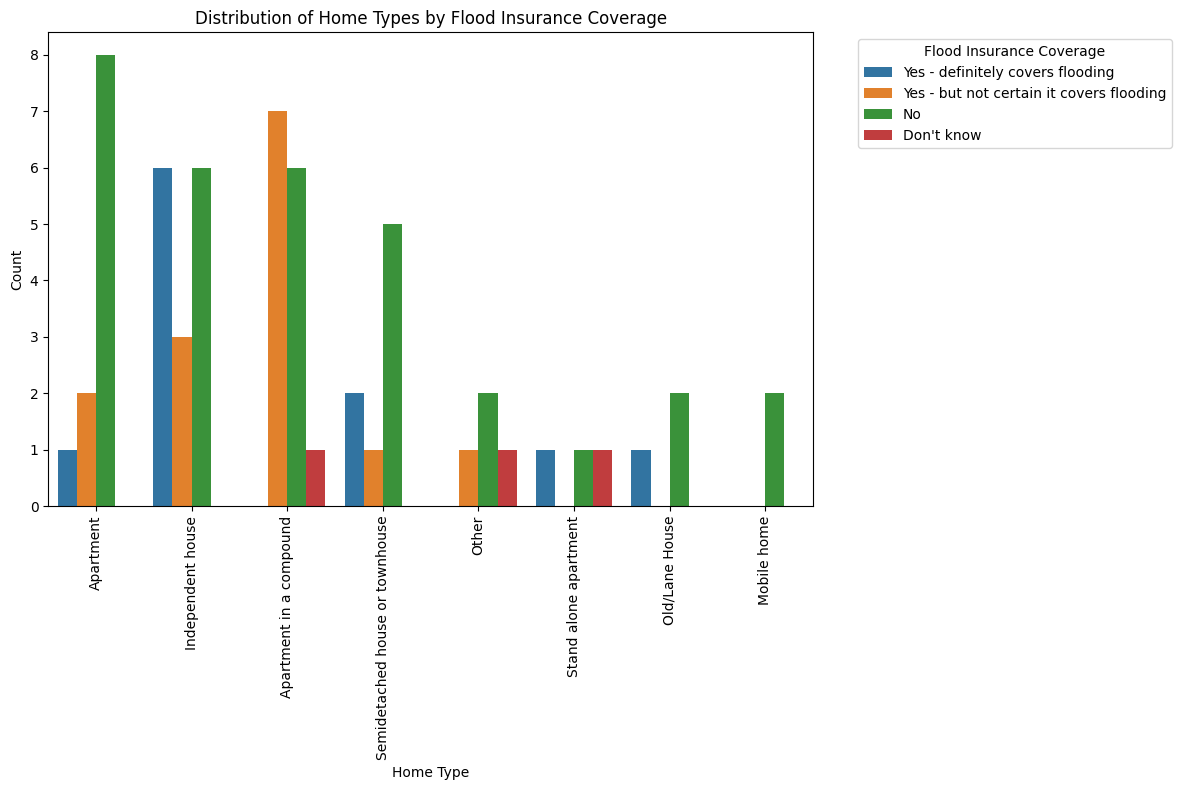

In [ ]:
# Assuming 'AllWave1' DataFrame already has the 'Q1_home_ID_NL_US' and 'Q41_ins_CN_ID_US' columns mapped to their textual descriptions

# Ensure the 'Q1_home_ID_NL_US' column is filled with 'Q1_home_CN' values for NaNs as you've done before
# Note: This step should already be done as per your previous message

# Visualize the distribution of home types with insurance coverage segmentation
plt.figure(figsize=(12, 8))
sns.countplot(data=AllWave1, x='Q1_home_ID_NL_US', hue='insurance_coverage_mapped', 
              order=AllWave1['Q1_home_ID_NL_US'].value_counts().index,
              hue_order=['Yes - definitely covers flooding', 'Yes - but not certain it covers flooding', 'No', "Don't know"])
plt.xticks(rotation=90)
plt.title('Distribution of Home Types by Flood Insurance Coverage')
plt.xlabel('Home Type')
plt.ylabel('Count')
plt.legend(title='Flood Insurance Coverage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


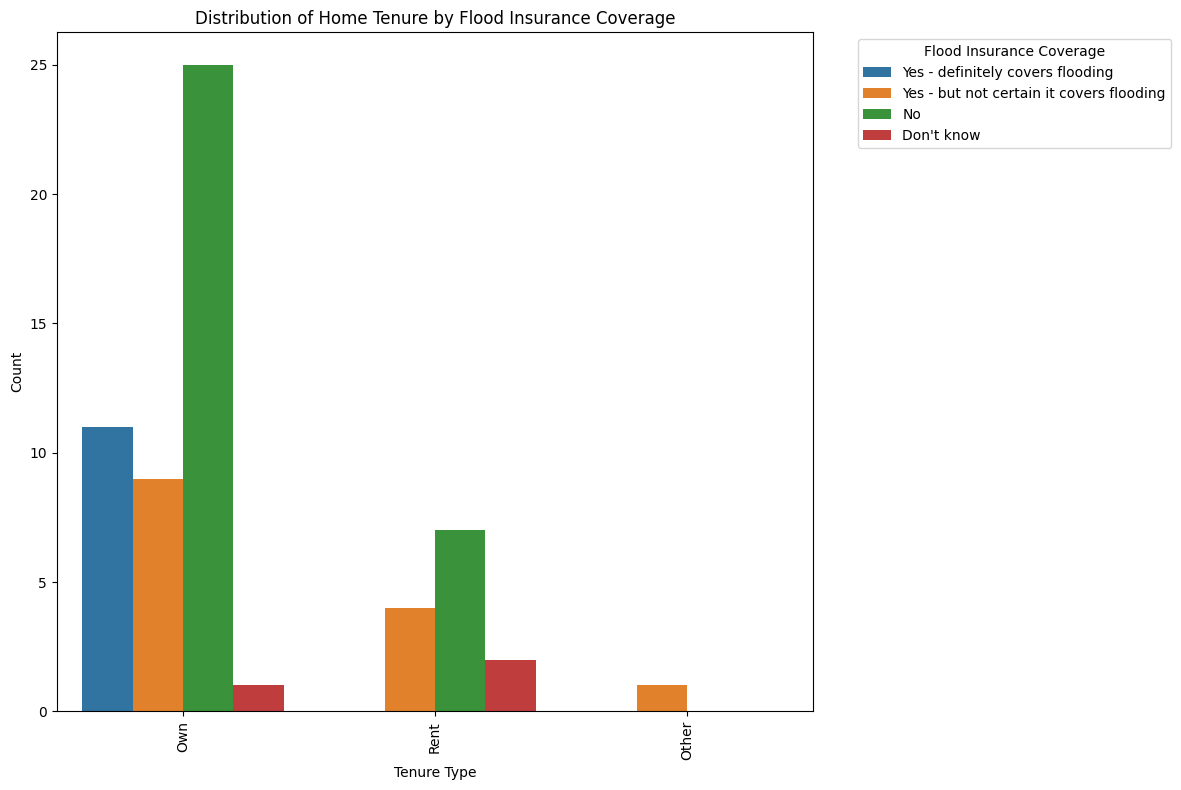

In [ ]:
# Assuming 'AllWave1' DataFrame already has the 'Q1_home_ID_NL_US' and 'Q41_ins_CN_ID_US' columns mapped to their textual descriptions

# Ensure the 'Q1_home_ID_NL_US' column is filled with 'Q1_home_CN' values for NaNs as you've done before
# Note: This step should already be done as per your previous message

# Visualize the distribution of home types with insurance coverage segmentation
plt.figure(figsize=(12, 8))
sns.countplot(data=AllWave1, x='rent_own_mapping', hue='insurance_coverage_mapped', order=AllWave1['rent_own_mapping'].value_counts().index,
              hue_order=['Yes - definitely covers flooding', 'Yes - but not certain it covers flooding', 'No', "Don't know"])
plt.xticks(rotation=90)
plt.title('Distribution of Home Tenure by Flood Insurance Coverage')
plt.xlabel('Tenure Type')
plt.ylabel('Count')
plt.legend(title='Flood Insurance Coverage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

In [ ]:
correlation_data = AllWave1[["Q18_flood_exp", "R05_worry", "R2_implementation_NM4"]].copy()
# Calculate Spearman correlation
correlation_matrix = correlation_data.corr(method='spearman')

correlation_matrix

,Q18_flood_exp,R05_worry,R2_implementation_NM4
Q18_flood_exp,1.000000,0.261944,-0.129233
R05_worry,0.261944,1.000000,-0.282069
R2_implementation_NM4,-0.129233,-0.282069,1.000000


In [ ]:
correlation_data = pd.DataFrame()
correlation_data['Q44_social_expectation'] = AllWave1['Q44_social_expectation'].copy()

# Create a new column that counts the occurrences of value == 1 in the specified columns
correlation_data['sum of household infrastructure change'] = AllWave1[['R2_implementation_SM1',
                                          'R2_implementation_SM2',
                                          'R2_implementation_SM3',
                                          'R2_implementation_SM4',
                                          'R2_implementation_SM5',
                                          'R2_implementation_SM6',
                                          'R2_implementation_SM7']].apply(lambda x: x.sum(), axis=1)

# Adjust 'Q41_ins_CN_ID_US' column based on the given condition
correlation_data['Intentional Flood insurance'] = AllWave1['Q41_ins_CN_ID_US'].apply(lambda x: 0 if x != 1 else x)

# Calculate Spearman correlation
correlation_matrix = correlation_data.corr(method='spearman')

correlation_matrix


,Q44_social_expectation,sum of household infrastructure change,Intentional Flood insurance
Q44_social_expectation,1.000000,-0.397670,0.338019
sum of household infrastructure change,-0.397670,1.000000,-0.263891
Intentional Flood insurance,0.338019,-0.263891,1.000000
